![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

In [5]:
#Escribe el título del proyecto en Markdown
titulo = "Artistas o grupos musicales con más exitos en Billboard Hot 100"
URL="https://en.wikipedia.org/wiki/Billboard_Hot_100"
introduction=' The first number-one song of the Billboard Hot 100 was "Poor Little Fool" by Ricky Nelson, on  started on August 4th 1958 As of the issue for the week ending on December 30th 2023, the Billboard Hot 100 has had 1,161 different number-one entries. The current number-one song on the chart is "All I Want for Christmas Is You" by Mariah Carey.[6]"'

edades de los artistas o grupos top

univariante
decidir que hacer con los géneros
columna por género
    

### TEMA

In [6]:
# Describe brevemente el tema del proyecto en Markdown
tema = "Exitos musicales en la lista Billboard Hot 100 desde 1966"

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Deberás tener más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

In [7]:
# Escribe tu hipótesis principal en Markdown
hipotesis_1 = "Qué grupo o artista es el que más éxitos ha tenido desde 1966"

In [8]:
# Escribe más hipótesis si las hubiera en Markdown
hipotesis_2 = "Que grupo o artista llevan más años en las listas más tiempo y de que generos"
hipotesis_3 = "Que grupo o artista llevan más exitos en los ultimos 10 años y de que generos"
hipotesis_4 = "Qué grupo o artista han sido 1 hit wonder y de que generos"
hipotesis_5 = "Qué generos corresponden a cada grupo o artista anterior"

# ...


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [19]:
import ast
import json
import numpy as np
import os
import pandas as pd
from bootcampviztools import *
#from bootcampviztools2 import *
from edafunctions import *


# guarda en variables los datasets y su fuente
df_Hot_100_Audio_Features = pd.read_csv("./data/Hot_100_Audio_Features.csv").set_index('index')#con género unknown
#df_Hot_100_Audio_Features_original = pd.read_csv("./data/Hot_100_Audio_Features_original.csv").set_index('index')#sin género unknown
#df_compare= df_Hot_100_Audio_Features.compare(df_Hot_100_Audio_Features_original)
#limpio duplicados
df_Hot_100_Audio_Features_backup_20240103 = df_Hot_100_Audio_Features.copy()
df_Hot_100_Audio_Features.drop_duplicates(inplace=True)
df_Hot_Stuff = pd.read_csv("./data/Hot_Stuff.csv").set_index('index')
df_genres_modificado = pd.read_csv("./data/df_genres_20231228_2104_without_column_unknown.csv",sep=";").set_index("index")
fuente_1 = "https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features"
#convierto en otra columna los géneros en una lista 
df_Hot_100_Audio_Features_backup = df_Hot_100_Audio_Features.copy()
#los vacíos son ahora del género unknown 
df_Hot_100_Audio_Features.spotify_genre.fillna("['unknown']",inplace=True)
#los nan de deanceability son ahora 0
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)
#con este instrucción creo la columna género adicional como lista 
df_Hot_100_Audio_Features["spotify_genre_list"] = df_Hot_100_Audio_Features.spotify_genre.apply(ast.literal_eval)
#reemplazo los espacios en los nombres por un guión bajo para poder referenciarlos correctamente cuando sea el nombre de una columna
value_to_find='unknown'
df_Hot_100_Audio_Features.drop(df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].index,inplace=True)
df_Hot_100_Audio_Features
#for indice, valor in enumerate(df_Hot_100_Audio_Features.spotify_genre_list):
    #print(f"indice:{indice} con valor:{valor}")
    #lista_temporal=[]
    #if len(valor)>1:
    #    
    #    for elemento in valor:
    #        elemento = elemento.replace(" ","_")
    #        lista_temporal.append(elemento)
    #else:
     #   lista_temporal.append(elemento)
    #df_Hot_100_Audio_Features.spotify_genre_list.at[indice] = lista_temporal

df_Hot_100_Audio_Features.spotify_genre_list = df_Hot_100_Audio_Features.spotify_genre_list.apply(lambda x: [item.replace(" ", "_") for item in x])
df_Hot_100_Audio_Features_genres_EDA=df_Hot_100_Audio_Features.copy()
df_Hot_Stuff_with_genres = pd.merge(df_Hot_100_Audio_Features_genres_EDA, df_Hot_Stuff, on='SongID', how='inner')
df_Hot_Stuff_with_genres["WeekID_As_Date"] = pd.to_datetime(df_Hot_Stuff_with_genres.WeekID)

In [ ]:
df_Hot_100_Audio_Features
value_to_find='mellow_gold'
condition_3 = df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)] 
condition_3 

In [ ]:
df_genres_modificado

In [ ]:
df_Hot_100_Audio_Features

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features

The Billboard Hot 100 Weekly Charts with Audio dataset is a comprehensive collection that combines the historical data of the Billboard Hot 100 weekly singles charts with detailed audio features extracted from Spotify. The dataset provides valuable insights into the popularity and musical attributes of songs that have appeared on the Billboard charts.

The primary dataset, Hot Stuff.csv, includes information about each song's position on the weekly charts. It contains columns such as the Billboard Chart URL, WeekID, Song name, Performer name, unique SongID (concatenation of song and performer), Current week on chart, Instance (indicating breaks in chart appearances), Previous week position, Peak Position (highest chart position reached), and Weeks on Chart.

The second dataset, Hot 100 Audio Features.csv, provides in-depth audio features of each song sourced from Spotify's Web API. This includes various metrics such as danceability (suitability for dancing based on musical elements), energy level (intensity and activity), key (musical key signature), loudness (overall volume level in decibels dB), mode (major or minor key), speechiness rating (presence of spoken words in songs), acousticness rating (acoustic quality measure), instrumentalness rating (likelihood of a song being instrumental), liveness rating (presence of a live audience during recording/performance) valence rating(musical positiveness conveyed by a song). Additionally it provides tempo in BPM and time signature(e.g., 4/4 -the rhythm pattern).

Furthermore , this comprehensive dataset encompasses Spotify-related features: track preview URL for audio samples before full streaming or purchase decisions; total duration measured in milliseconds; explicit content indication; album details for songs; genre details provided by Spotify.

With this combined data set, researchers can analyze trends and patterns over time regarding how different audio features relate to a song's popularity and performance on the Billboard Hot 100. It offers endless possibilities for studying the influence of specific music attributes on commercial success and understanding the preferences of popular music audiences.

Whether you are interested in exploring genre-based trends, discovering correlations between chart positions and audio features, or investigating how certain attributes contribute to a song's longevity on the charts, this dataset serves as a valuable resource for deep analysis and insights into Billboard Hot 100 songs

Understanding the Datasets:
<pre>
The dataset consists of two files: Hot Stuff.csv and Hot 100 Audio Features.csv.
The Hot Stuff.csv file contains the weekly Hot 100 singles chart data, including song names, performer names, chart positions, 
and other relevant information.
The Hot 100 Audio Features.csv file contains detailed audio features for each song extracted from Spotify, such as danceability, 
energy, instrumentalness, etc.
Both files can be merged using common attributes like Performer and Song to get a combined view of both datasets.
Exploring the Hot Stuff.csv File:
</pre>
<pre>
This file provides information about each song's position on that week's Hot 100 singles chart.
Important columns in this file are:

    WeekID: The week identifier.
    Song name: The name of the song.
    Performer name: The name of the performer or artist.
    Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
    Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).
    Previous week position: The position of the song on the previous week's chart.
    Peak Position: The highest position reached by a particular song on any given week's chart.
    Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
    
Exploring the Hot 100 Audio Features.csv File:
</pre>
<pre>
This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.
It contains attributes like danceability, energy, instrumentalness, tempo, etc., which help capture different aspects of the song's musical characteristics.
Important columns in this file are:

    Performer: The name of the performer or artist of the song.
    Song: The name of the song.
    spotify_genre: The genre(s) of the song according to Spotify.
    spotify_track_duration_ms: The duration
</pre>

<pre>
Predicting the popularity of a song: 
    By analyzing the audio features such as danceability, energy, valence, and tempo, this dataset can be used to develop models that 
    predict the popularity of a song on the Billboard Hot 100 chart.
Genre analysis: 
    With the spotify_genre column providing information about the genre(s) of each song according to Spotify, this dataset can be 
    utilized to analyze trends in popular genres over time and identify patterns in genre preferences among listeners.
Impact of explicit content on chart performance: 
    By examining the spotify_track_explicit column and comparing it with other variables like peak position and weeks on chart, this 
    dataset can be used to explore whether songs with explicit content are more or less likely to achieve high positions on the 
    Billboard Hot 100 chart
</pre>

If you use this dataset in your research, please credit the original authors.

Data Source

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features#:~:text=the%20original%20authors.-,Data%20Source,-License

You are free to:
Share - copy and redistribute the material in any medium or format for any purpose, even commercially.
Adapt - remix, transform, and build upon the material for any purpose, even commercially.
You must:
Give appropriate credit - Provide a link to the license, and indicate if changes were made.
ShareAlike - You must distribute your contributions under the same license as the original.
Keep intact - all notices that refer to this license, including copyright notices.

In [ ]:
df_Hot_Stuff.describe

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [ ]:
# Primer dataset
df_Hot_100_Audio_Features.head(50)
#columnas por género en otro df
    #univariante  con cantantes por éxito
#bivariante con los géneros con más canciones
#duración media de la canción
#heatmap tabla contingencia de los géneros
    #en los colores 
#buscar librería counter


In [ ]:
df_Hot_100_Audio_Features.head(50)


In [ ]:
df_Hot_Stuff.head(50)


In [ ]:
df_Hot_100_Audio_Features.spotify_genre.head(25)
#transformar lista en columnas


In [ ]:
df_Hot_100_Audio_Features.spotify_genre_list

In [ ]:
#creo un diccionario para crear las columnnas del dataset de generos
list_with_all_genres =[]
for valor in df_Hot_100_Audio_Features.spotify_genre_list:
    #print(type(valor))
    if len(valor)==1:
        if valor[0] not in list_with_all_genres:
            list_with_all_genres.append(valor[0])
    elif len(valor)>1:
        i=0
        for i in range(len(valor)):
            if valor[i] not in list_with_all_genres:
                list_with_all_genres.append(valor[i])
print(f"Longitud de todos los géneros:{len(list_with_all_genres)}")

In [ ]:
super_list_genres =[]#para la tabla
super_dict_genres={}#para filtrar el top 50 de géneros
#super_dict_genres_columns={}#para filtrar el top 50 de géneros
#super_dict_genres_columns_SongID={"SongID":None}
for valor in df_Hot_100_Audio_Features.spotify_genre_list:
    if len(valor)==1:
        if valor[0] not in super_list_genres:
            super_list_genres.append(valor[0])
    elif len(valor)>1:
        i=0
        for i in range(len(valor)):
            if valor[i] not in super_list_genres:
                super_list_genres.append(valor[i])

for clave in super_list_genres:#inicializo el diccionario
        super_dict_genres[clave]=0
#        super_dict_genres_columns[clave]=False

#super_dict = {**super_dict_genres_columns, **super_dict_genres_columns_SongID}
#print(super_dict.items())
#lista_temporal_2=list(super_dict.keys())
#print(type(lista_temporal_2))
super_dict_genres


In [ ]:
for valor in df_Hot_100_Audio_Features.spotify_genre_list:#acumulo en la clave del género
    if len(valor)==1:
            super_dict_genres[valor[0]]=super_dict_genres[valor[0]]+1
    elif len(valor)>1:
        i=0
        for i in range(len(valor)):
            super_dict_genres[valor[i]]=super_dict_genres[valor[i]]+1
#super_dict_genres
top_50_entries = dict(sorted(super_dict_genres.items(), key=lambda item: item[1], reverse=True)[:50]) #50 campos porque de lo contrario eran 1384 columnas
valor_de_corte = list(top_50_entries.values())[-1]
valor_de_corte
top_50_entries
list_top_50_entries = list(top_50_entries.keys())
list_top_50_entries

In [ ]:


# Display the DataFrame
df_genres = populate_with_mutlpile_boolean_columns(df_Hot_100_Audio_Features,list_top_50_entries)
df_backup = df_genres.copy()
df_genres


In [ ]:
#innecesario si se ha cargado el CSV al principio
df_genres[["spotify_genre_list","SongID"]] = df_Hot_100_Audio_Features[["spotify_genre_list","SongID"]]


In [ ]:
df_genres

In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_genres
df_genres_modificado = df_genres.copy()
#df_genres_modificado.to_json("./data/df_genres_modificado.json",column_name=)
# Convert DataFrame to JSON with column names included
df_genres_modificado.to_json('./data/data_with_columns_orient_split.json', orient='split')
#json_data = df_genres_modificado.to_dict(orient='records')
df_genres_modificado.to_csv('./data/data_with_columns.csv',sep=";",index=True)

# Save JSON to a file
#with open('./data/data_with_columns_v2.json', 'w') as json_file:
#    json_file.write(str(df_genres_modificado.columns.tolist()) + '\n')
#    for record in json_data:
#        json_file.write(str(record) + '\n')


In [ ]:
#innecesario si se ha cargado el CSV al principio
#no funciona bien el fichero si la función
df_genres_modificado_json = pd.read_json('./data/data_with_columns_orient_split.json', orient='split')


In [ ]:
#innecesario si se ha cargado el CSV al principio
# Compare the DataFrames
comparison = df_genres_modificado.compare(df_genres_modificado_json)

# Display the differences
print("Differences between df_genres_modificado and df_genres_modificado_json:")
print(comparison)

In [ ]:
#innecesario si se ha cargado el CSV al principio
borrados_un_solo_genero=0
borrados_multiples_generos=0
indices_a_borrar=[]
for indice,fila in df_genres.iterrows():
    
    indice_df_genres_modificado = df_genres_modificado[df_genres_modificado["SongID"]==fila.SongID].index

    if len(fila.spotify_genre_list)==1:
        #print(f"len(fila.spotify_genre_list):{len(fila.spotify_genre_list)}")
        if fila.spotify_genre_list[0] in df_genres_modificado:
            #print(f"fila.SongID:{fila.SongID} fila.spotify_genre_list[0]:{fila.spotify_genre_list[0]}")
            #print(f"indice_df_genres_modificado:{indice_df_genres_modificado}")
            df_genres_modificado.at[indice_df_genres_modificado,fila.spotify_genre_list[0]]=True
            #print(f"df_genres_modificado:{df_genres_modificado[df_genres_modificado['SongID']==fila.SongID]}")
            #df_genres_modificado.loc["SongID"==fila.SongID,fila.spotify_genre_list[0]]=True
    #    print(f"df_genres[df_genres['SongID']==cancion].index:{df_genres[df_genres['SongID']==fila.SongID].index}")
        else:
            #borramos el registro
            #print(f"borro: {fila.SongID} con indice:{indice_df_genres_modificado} y este género:{fila.spotify_genre_list[0]}")
            #df_genres_modificado.drop(indice_df_genres_modificado,inplace=True)
            indices_a_borrar.append(indice_df_genres_modificado)
            borrados_un_solo_genero=borrados_un_solo_genero+1
    else:
        columnas_a_actualizar=[]
        total_generos = len(fila.spotify_genre_list)
        #contador_total_generos = 0
        for elemento in fila.spotify_genre_list:
            if elemento in df_genres_modificado:
                #print(f"fila.SongID:{fila.SongID} fila.spotify_genre_list[0]:{fila.spotify_genre_list[0]}")
                columnas_a_actualizar.append(elemento)
                #print(f"indice_df_genres_modificado:{indice_df_genres_modificado}")
                #print(f"df_genres_modificado:{df_genres_modificado[df_genres_modificado['SongID']==fila.SongID]}")
        if len(columnas_a_actualizar)!=0:
        #print(f"columnas_a_actualizar:{columnas_a_actualizar}")
            df_genres_modificado.loc[indice_df_genres_modificado,columnas_a_actualizar]=True
        else:
            #print(f"borro en el segundo bucle: {fila.SongID} con indice:{indice_df_genres_modificado} y estos géneros:{fila.spotify_genre_list}")
            borrados_multiples_generos=borrados_multiples_generos+1
            #df_genres_modificado.drop(indice_df_genres_modificado,inplace=True)
            indices_a_borrar.append(indice_df_genres_modificado)
df_genres_modificado.drop(indices_a_borrar,inplace=True)
print(f"Se han borrado borrados_un_solo_genero:{borrados_un_solo_genero}")
print(f"Se han borrado borrados_multiples_generos:{borrados_multiples_generos}")

In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_Hot_100_Audio_Features.spotify_genre_list = df_Hot_100_Audio_Features.spotify_genre_list.replace(" ","_",inplace=True)
df_genres_modificado.to_json('./data/df_genres_20231226_2110.json', orient='split')

In [ ]:
#innecesario si se ha cargado el CSV al principio
indices_unknown=list(df_genres_modificado.loc[df_genres_modificado["unknown"]==True].index)
df_genres_modificado.drop(indices_unknown,inplace=True)


In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_genres_modificado.drop(columns="unknown",inplace=True)
#df_genres_modificado
#df_genres_modificado.to_json('./data/df_genres_20231228_2104_without_column_unknown.json', orient='split')
df_genres_modificado.to_csv('./data/df_genres_20231228_2104_without_column_unknown.csv', sep=";",index=True, index_label='index')


In [ ]:
#innecesario si se ha cargado el CSV al principio
df_genres_modificado.loc[[29501],["lounge"]]

In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_result = pd.merge(df_Hot_100_Audio_Features, df_Hot_Stuff, how="inner", on=["Song", "SongID"])

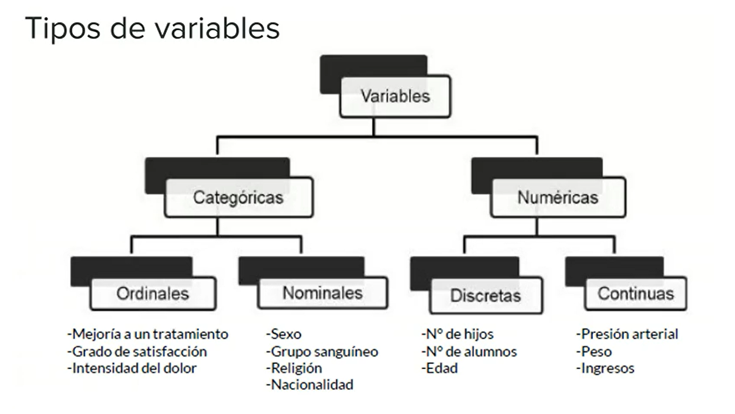

<PRE>
Variables in explanatory data analysis can be classified into different types based on their nature and the kind 
of data they represent. 
The main types of variables are:

1. Categorical Variables:

    Nominal: Qualitative data without any inherent order or ranking (e.g., gender, colors, musical genres).
    
    Ordinal: Qualitative data with a specific order or ranking (e.g., ratings - low, medium, high).

2. Numerical Variables:
    
    Discrete: Quantitative data that take on a countable set of values (e.g., counts, whole numbers).
    
    Continuous: Quantitative data that can take any value within a given range (e.g., height, weight).

3. Time-related Variables:

    Interval: Time or numerical data where the difference between values is consistent, but there's no true zero point 
              (e.g., temperature in Celsius or Fahrenheit).
    
    Ratio: Time or numerical data with a true zero point, where ratios and proportions make sense (e.g., age, income).

4. Derived Variables:
    
    Composite or Derived: Variables created from the original data through calculations or transformations 
                          (e.g., percentages, averages, ratios).

5. Univariate vs. Multivariate Variables:
    
    Univariate: Variables analyzed individually to understand their distributions and characteristics.

    Multivariate: Analysis involving relationships between multiple variables simultaneously (e.g., correlations, regressions).
    
    Understanding the types of variables helps in choosing appropriate statistical techniques and visualization methods during 
    data exploration. 
    For instance,  different visualizations (e.g., histograms, bar plots, box plots) are suitable for different 
    variable types, aiding in better interpretation and analysis.

During an explanatory data analysis, identifying and appropriately handling these variable types are crucial 
for uncovering patterns, relationships, and insights within the data.
<PRE>

**Dataset:**  Hot_Stuff.csv  

**Descripción:** This file provides information about each song's position on that week's Hot 100 singles chart

**Periodo:**  From 01/01/1963 to 31/12/2023

<h1>df_Hot_Stuff</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>url</td><td>URL of the song</td><td>string</td><td>1</td><td></td></tr>
<tr><td>WeekID</td><td>Date of the song</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Week Position</td><td>Position on the chart </td><td>string</td><td>2</td><td></td></tr>
<tr><td>Song</td><td>Title of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Instance</td><td>Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Previous Week Position</td><td>URL of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Peak Position</td><td>The highest position reached by a particular song on any given week's chart</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Weeks on Chart</td><td>Represents how many weeks a specific entry has spent on the chart so far</td><td>string</td><td>2</td><td></td></tr>
</table>

 <pre>
 WeekID: The week identifier.
 Song name: The name of the song.
 Performer name: The name of the performer or artist.
 Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
 Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
           appeared for the sixth time).
 Previous week position: The position of the song on the previous week's chart.
 Peak Position: The highest position reached by a particular song on any given week's chart.
 Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
</pre>

**Dataset:**  df_genres_20231228_2104_without_column_unknown.csv

**Descripción:** Listado con songID y los 50 géneros musicales de Spotify a True or False

**Periodo:**  De 01/01/1963 a 31/12/2013

<h1>df_genres_modificado</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Multiple names of genres</td><td>False or True depending of the genre that is on the next column</td><td>Binaria</td><td>0</td><td></td></tr>
<tr><td>spotify_genre_list</td><td>List of genres of the song</td><td>Categórica nominal</td><td>2</td><td></td></tr>
</table>

**Dataset:**  Hot_100_Audio_Features.csv  
**Descripción:** This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.  
**Periodo:**  From 01/01/1963 to 31/12/2023 

<h1>df_Hot_100_Audio_Features</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>Categórica nominal</td><td>0</td><td></td></tr>
<tr><td>Song</td><td>Name of the song</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_genre</td><td>genre according to Spotify</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_track_id</td><td>ID of the track on Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_preview_url</td><td>URL of the song at Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_duration_ms</td><td>Duration in ms of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>spotify_track_explicit</td><td>Unknown</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_album</td><td>URL of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>danceability</td><td>describing how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity.</td><td>Numérica continua</td><td>1</td><td></td></tr>
<tr><td>energy</td><td>representing "a perceptual measure of intensity and activity", based on the track's dynamic range, perceived loudness, timbre, onset rate, and general entropy</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>key</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>loudness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>mode</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>speechiness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>acousticness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>instrumentalness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>liveness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>valence</td><td>describing "the musical positiveness of the track". Generally speaking, tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while songs with low valence sound more negative (e.g., sad, depressed, angry)</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>tempo</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>time_signature</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_popularity</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
</table>

<pre>
SongID
Performer
Song
spotify_genre
spotify_track_id
spotify_track_preview_url
spotify_track_duration_ms
spotify_track_explicit
spotify_track_album
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
spotify_track_popularity
</pre>

In [ ]:
df_tipificacion_df_Hot_Stuff = pd.DataFrame([df_Hot_Stuff.nunique(), df_Hot_Stuff.nunique()/len(df_Hot_Stuff) * 100, df_Hot_Stuff.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Stuff["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Stuff

In [ ]:

df_tipificacion_df_Hot_100_Audio_Features_genres_EDA = pd.DataFrame([df_Hot_100_Audio_Features_genres_EDA.nunique(), df_Hot_100_Audio_Features_genres_EDA.nunique()/len(df_Hot_100_Audio_Features_genres_EDA) * 100, df_Hot_100_Audio_Features_genres_EDA.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA

In [ ]:
df_tipificacion_df_Hot_Audio_Features= pd.DataFrame([df_Hot_100_Audio_Features.nunique(), df_Hot_100_Audio_Features.nunique()/len(df_Hot_100_Audio_Features) * 100, df_Hot_100_Audio_Features.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Audio_Features
df_tipificacion_df_Hot_Audio_Features["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Audio_Features

In [ ]:
df_Hot_Stuff_with_genres["WeekID_As_Date"]

In [ ]:
# Siguiente dataset...
# df_2.head()
df_Hot_100_Audio_Features_genres_EDA = df_genres_modificado.copy()
genres=['mellow_gold','soft_rock','adult_standards','brill_building_pop','rock','dance_pop','pop','soul','motown','pop_rap','rap','folk_rock','album_rock','classic_rock','quiet_storm','hip_hop','rock-and-roll','bubblegum_pop','funk','classic_soul','urban_contemporary','country','r&b','disco','post-teen_pop','new_wave_pop','contemporary_country','country_rock','country_road','southern_soul','trap','folk','pop_rock','southern_hip_hop','hard_rock','lounge','hip_pop','rockabilly','rhythm_and_blues','art_rock','dance_rock','merseybeat','new_jack_swing','easy_listening','doo-wop','classic_uk_pop','psychedelic_rock','gangster_rap','roots_rock']
genre_counts = df_Hot_100_Audio_Features_genres_EDA[genres].sum().reset_index()
genre_counts.columns = ['Genre', 'Count']
#df_genres_totals = pd.DataFrame(dict_genres_totals)
genre_counts
#in groups of five years

In [ ]:
data = {
    'Column_Name': ['A', 'B', 'A', 'C', 'B', 'A']  # Replace with your column data
}

df = pd.DataFrame(data)

# Count occurrences of unique values in the column
ocurrences = df['Column_Name'].value_counts().reset_index()
ocurrences.columns=['Column Name','Count']
ocurrences

In [ ]:

df_total_counts = totals_of_a_string_column(df_Hot_100_Audio_Features,['Performer'],'Performer')
join_df_total_counts_with_df_Hot_Stuff=pd.merge(df_total_counts,df_Hot_Stuff_with_genres,on='Performer', how='inner')
join_df_total_counts_with_df_Hot_Stuff
#list_of_pandas_dataset=save_totals_of_a_string_column(join_df_total_counts_with_df_Hot_Stuff,'Performer','WeekID_As_Date',date_start='1963-01-01',date_end='2023-12-31',frequency='5Y')


In [ ]:
# Assuming 'billboard_data' contains the Billboard Hot 100 dataset with genre columns
# Create a date range from 1966 to late 2023 in 5-year intervals
start_date = pd.to_datetime('1963-01-01')
end_date = pd.to_datetime('2023-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='5Y')
loop_init = 0
loop_end =  0
# Iterate through date intervals
for i in range(len(date_range) - 1):
    
    start = date_range[i]
    end = date_range[i + 1]
    # Filter the dataset for the current interval
    interval_data = df_Hot_Stuff_with_genres[(df_Hot_Stuff_with_genres['WeekID_As_Date'] >= start) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] < end)]

    # Calculate genre counts for the current interval
    #genre_columns = interval_data.loc[:, genres]  # Adjust column names accordingly
    genre_counts = interval_data[genres].sum().reset_index()
    genre_counts.columns = ['Genre', 'Count']
    str_start_date= str(start.year)+"/01/01"
    str_end_date= str(end.year)+"/12/31"
    genre_counts['start_date'] = pd.to_datetime(str_start_date)
    genre_counts['end_date'] =  pd.to_datetime(str_end_date)
    

    # Save the dataset for the current interval (you can save it to a file or use as needed)
    file_name = f"./data_genre/genre_counts_{start.year}-{end.year}.csv"
    genre_counts.reset_index(inplace=True)
    genre_counts.index.name="index"
    genre_counts.to_csv(file_name, index=False,sep=";")  # Save to a CSV fil

In [ ]:
df_Hot_Stuff_with_genres.describe().loc["max"]

df_filtered=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres["Performer"].str.contains("Taylor Swift")]
df_filtered.groupby(["Performer","Song"]).size().reset_index(name='Occurrence_Count')


In [ ]:
columns_for_filtering = list_top_50_entries.copy()
columns_for_filtering.append("Performer")
columns_for_filtering.append("Song")
columns_for_filtering.remove("unknown")
df_top_1 = df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres["Week Position"]==1][columns_for_filtering]
df_top_1

In [ ]:
unique_values = df_Hot_Stuff_with_genres['SongID'].unique()
unique_df = pd.DataFrame(unique_values, columns=['SongID'])
unique_df
df=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['SongID']=="......And Roses And RosesAndy Williams"].sort_values(by='WeekID_As_Date',ascending=True).copy()
df.reset_index(inplace=True)



In [ ]:
#estoy aquí 2024/01/04 21:49
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
####
value_to_find='mellow_gold'
condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < pd.to_datetime('1968-01-01')
condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]            
####

In [ ]:
        for index,row in df_categorica.iterrows():
            value_to_find=row['Genre']
            condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < pd.to_datetime('1968-01-01')
            #print("condition_1_total_of",len(condition_1))
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
            #print("condition_2_total_of",len(condition_2))
            condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]
            #print(condition_3)
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy()
            performer.reset_index(inplace=True)
            #print(performer.columns)
            #print('Performer y:',performer['Performer_y'])
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].copy()
           #print("Condition_3:",condition_3['Performer'])
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True)

            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='right')
            unique_values= df_artists_of_the_genre['Performer_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df = pd.DataFrame(unique_values, columns=['Performer'])
            unique_df = unique_df.head(5).copy()
            #print(f"unique_df:{unique_df}")
            #print("performer:",len(performer))
            #print("performer type:",type(performer))
            #performer['Performer'].nunique()
            print(f"{value_to_find} has this performers:",end='')
            loop=0
            #print("columns:",unique_df.columns)
            for index_1, row_1 in unique_df.head(5).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                if loop != 0:
                    print(f", {row_1['Performer']}",end="")
                else:
                    print(f"{row_1['Performer']}",end="")
                loop=+1
            print("")
            print("")
            


In [ ]:
for index_1, row_1 in performer.head(5).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                if loop != 0:
                    print(f", {row_1['Performer_x']}",end="")
                else:
                     print(f"{row_1['Performer_x']}",end="")
                loop=+1

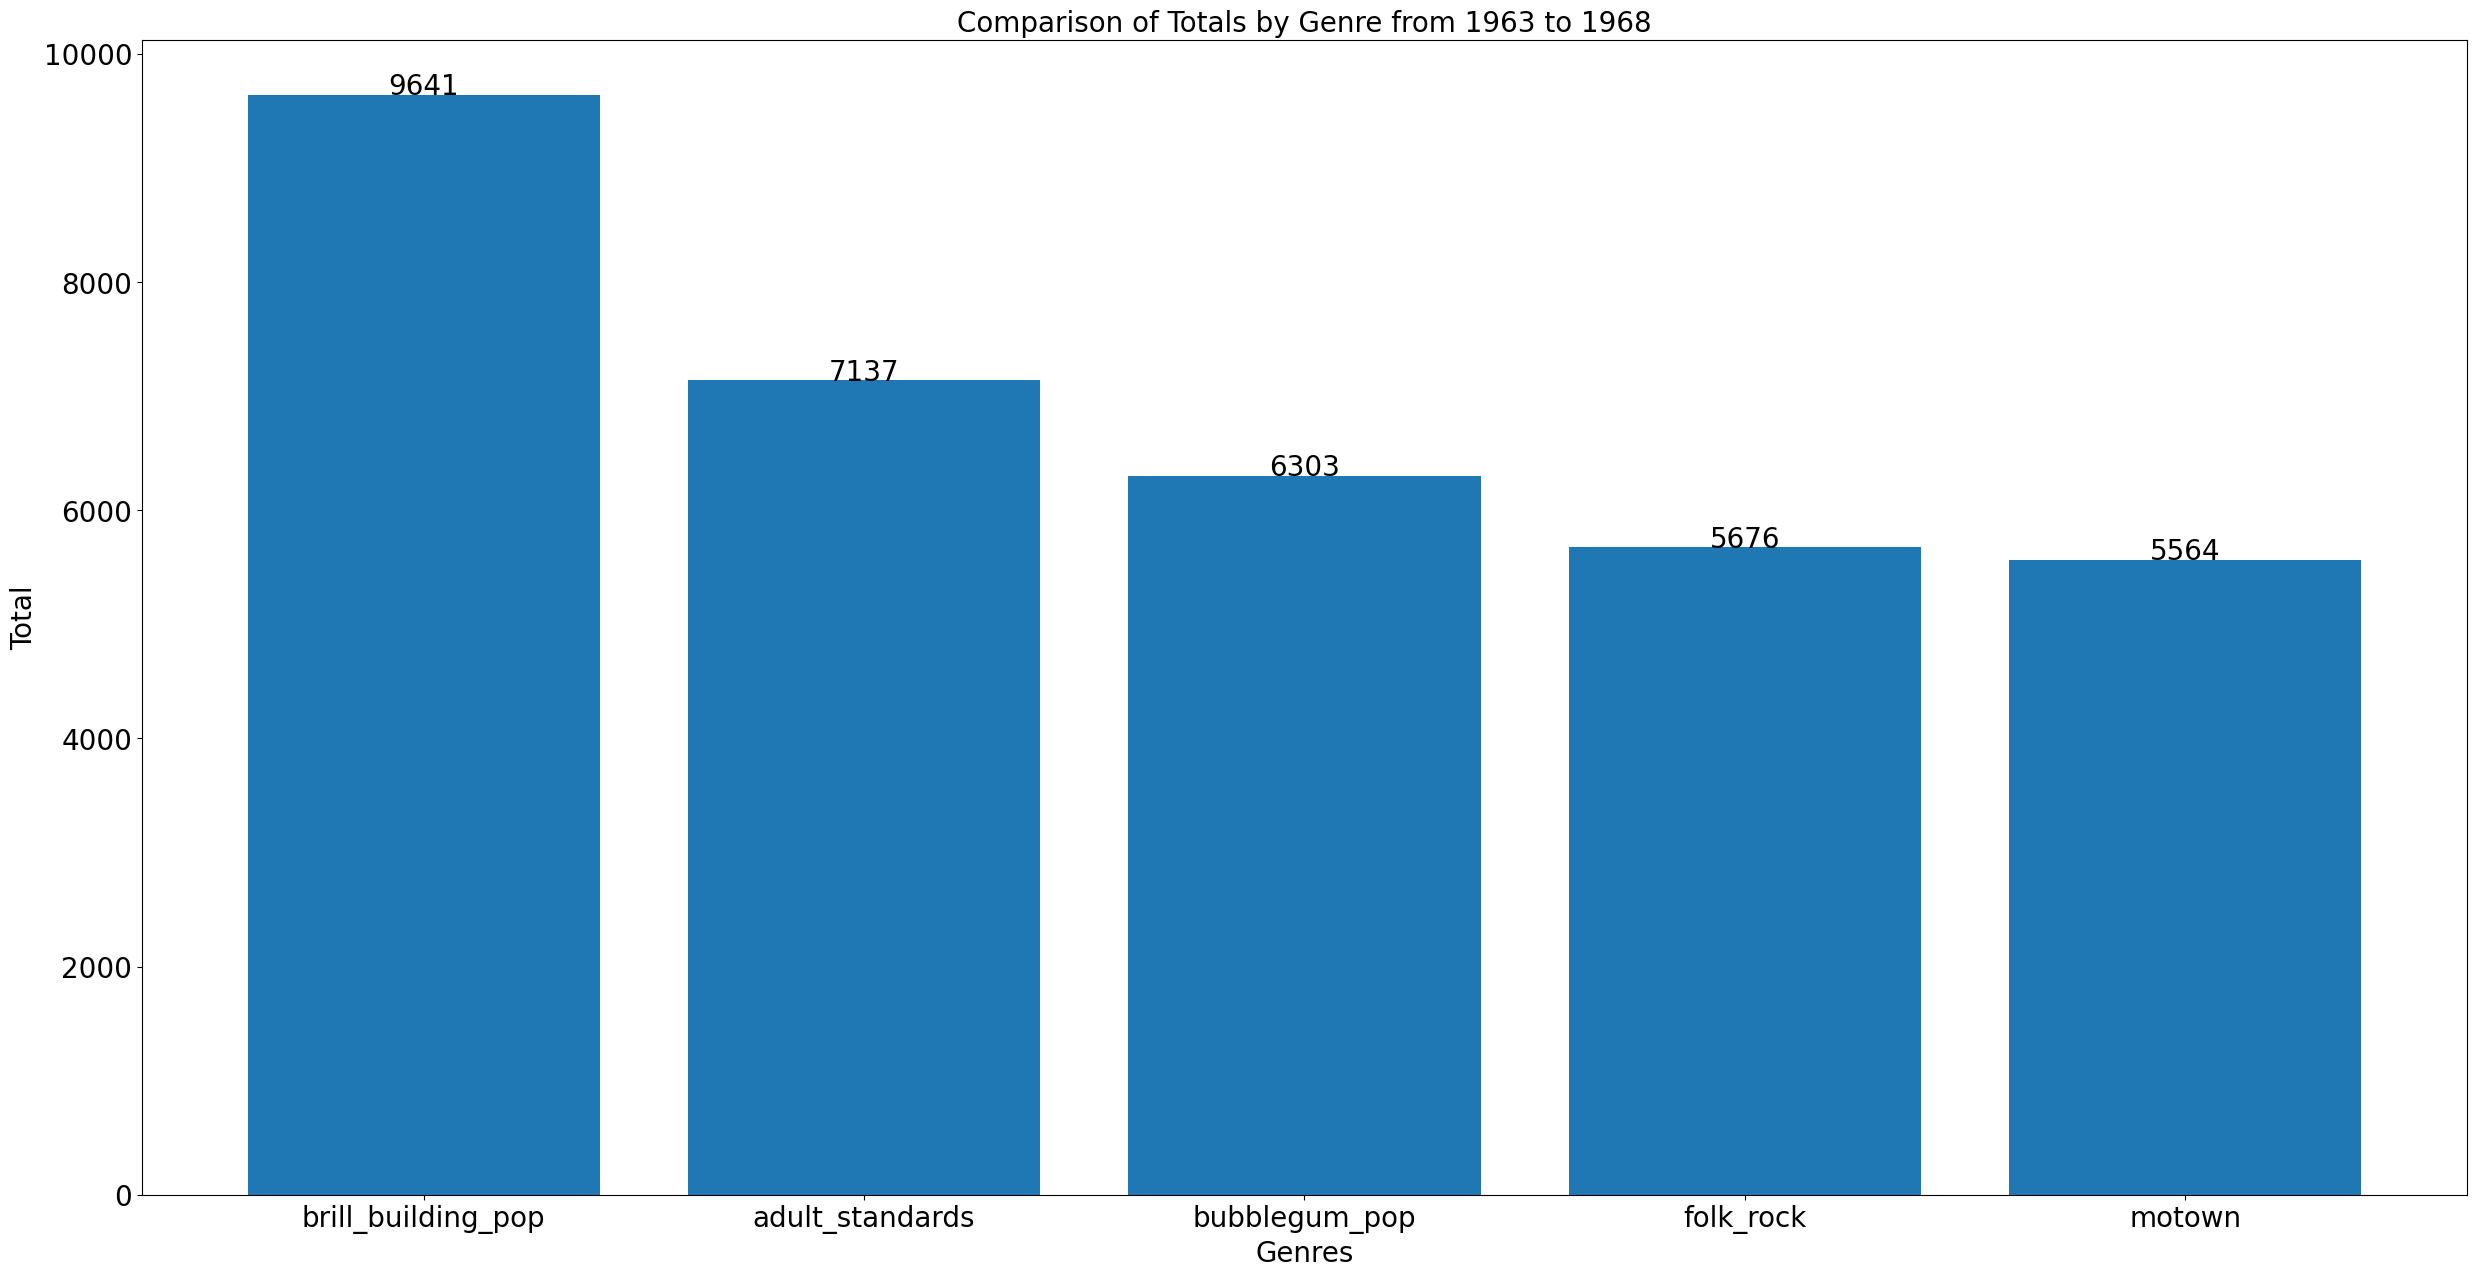

brill_building_pop has this performers:Steve Lawrence with song (I Don't Care) Only Love Me, The Temptations with song (I Know) I'm Losing You, Johnny Rivers with song (I Washed My Hands In) Muddy Water, The Monkees with song (I'm Not Your) Steppin' Stone, Little Peggy March with song (I'm Watching) Every Little Move You Make

adult_standards has this performers:Steve Lawrence with song (I Don't Care) Only Love Me, The Temptations with song (I Know) I'm Losing You, Four Tops with song (It's The Way) Nature Planned It, Dean Martin with song (Open Up The Door) Let The Good Times In, Gary Lewis And The Playboys with song (You Don't Have To) Paint Me A Picture

bubblegum_pop has this performers:Johnny Rivers with song (I Washed My Hands In) Muddy Water, The Monkees with song (I'm Not Your) Steppin' Stone, Gary Lewis And The Playboys with song (You Don't Have To) Paint Me A Picture, The McCoys with song (You Make Me Feel) So Good, The Righteous Brothers with song (You're My) Soul And Inspir

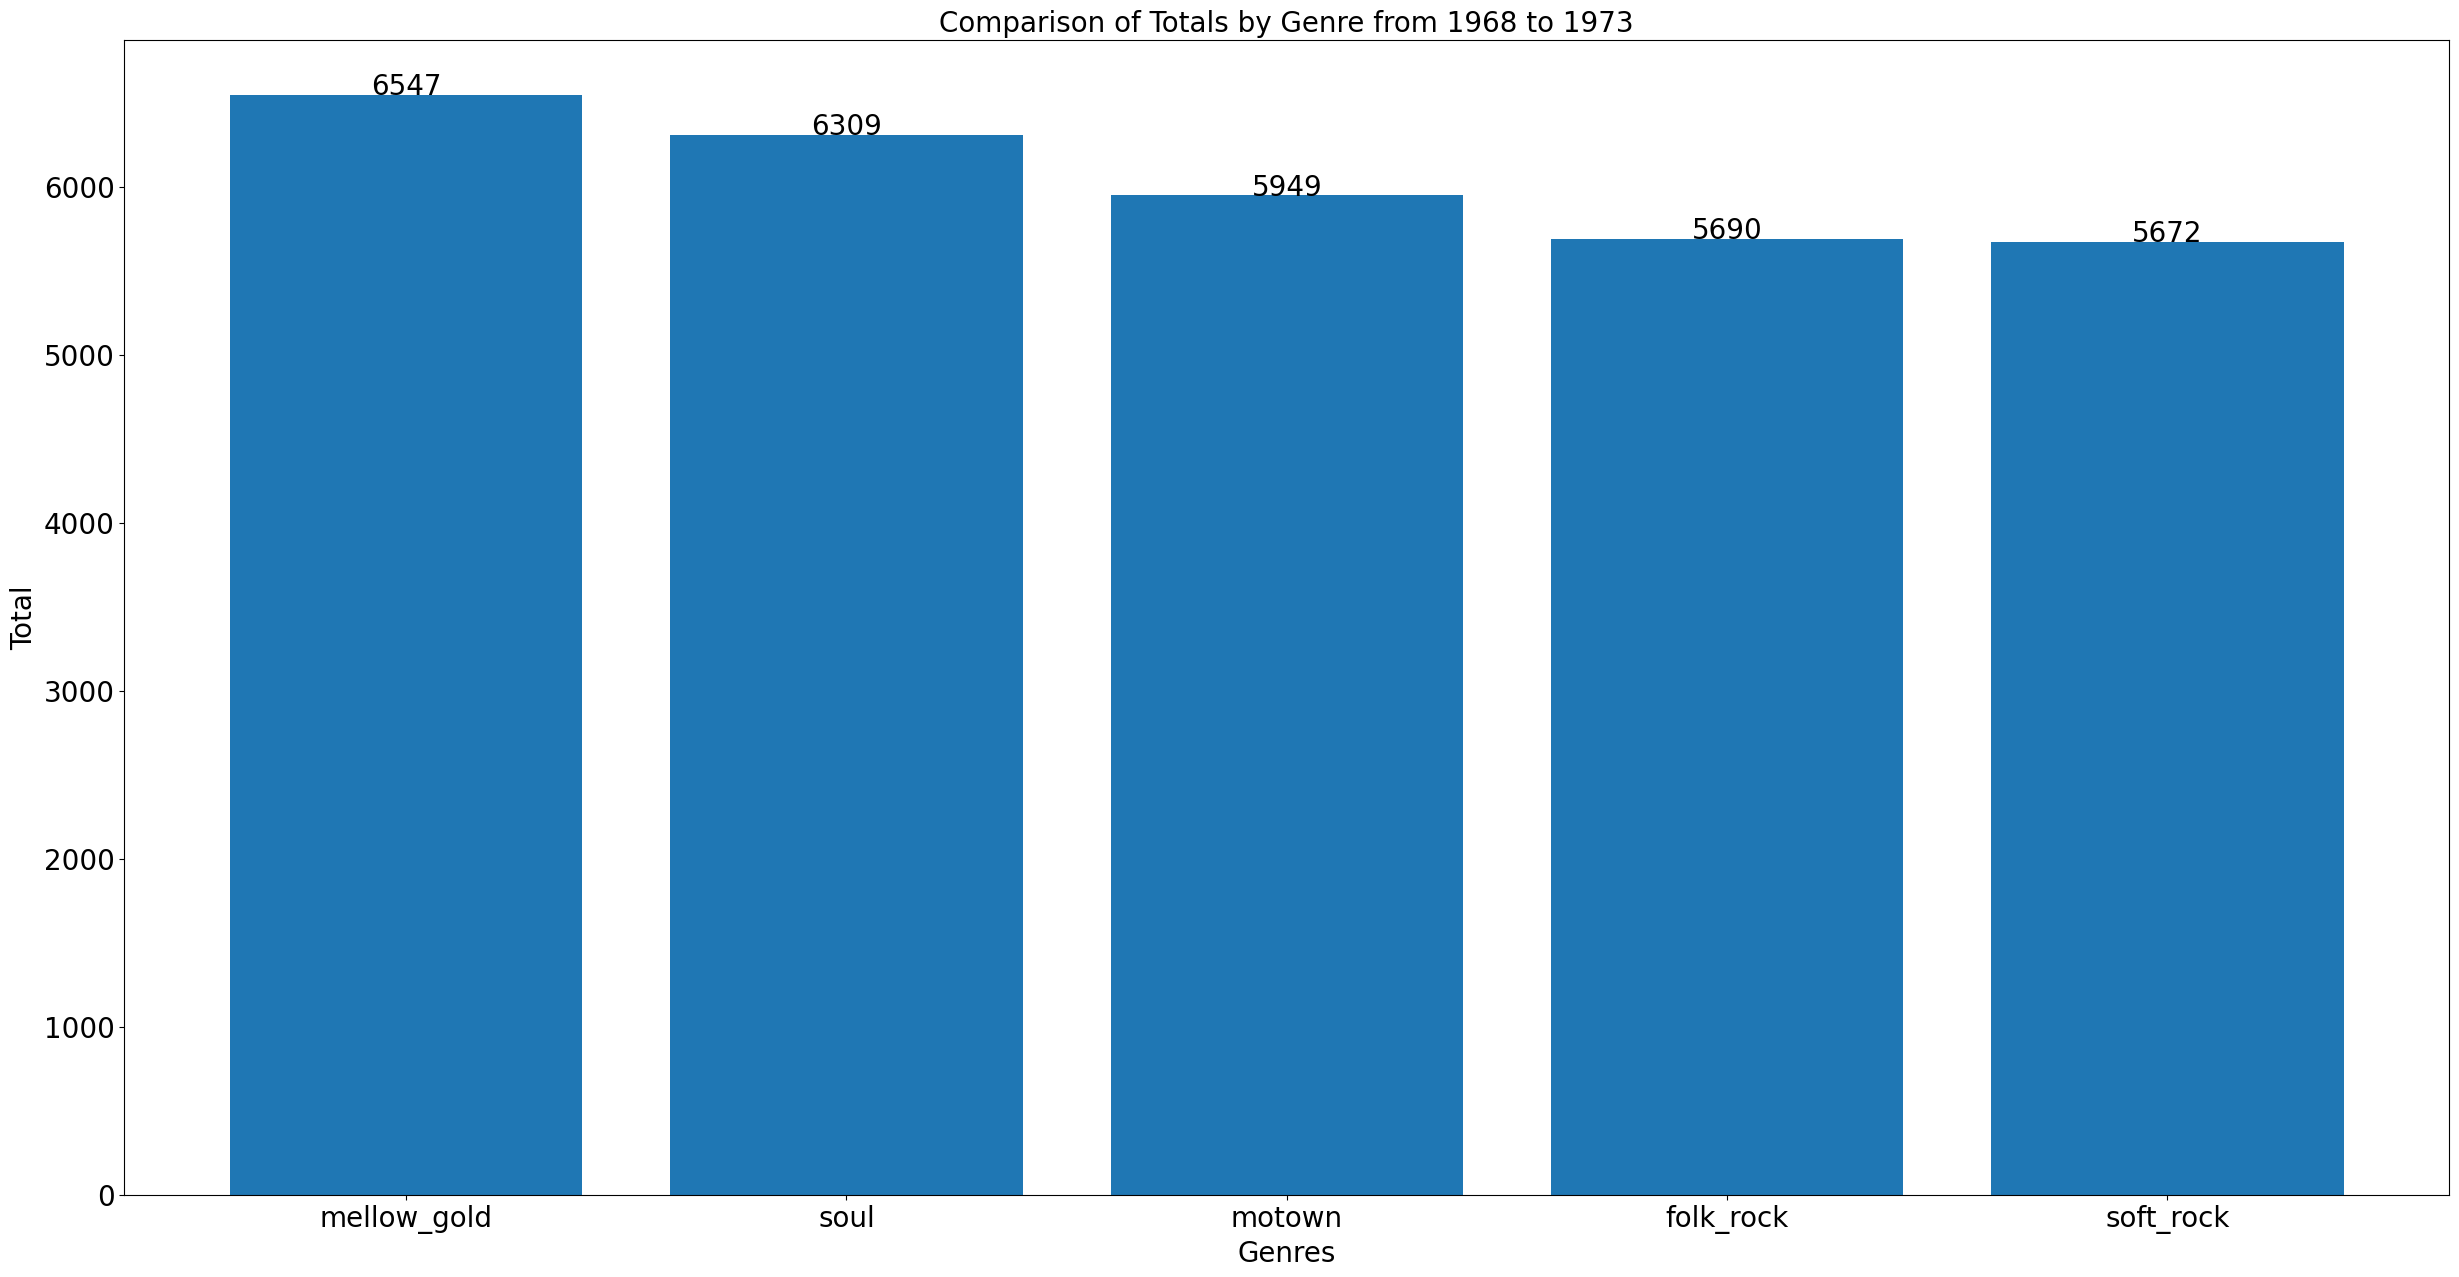

mellow_gold has this performers:Neil Diamond with song "Cherry Cherry" from Hot August Night, B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song, The 5th Dimension with song (Last Night) I Didn't Get To Sleep At All, Elton John with song (Sartorial Eloquence) Don't Ya Wanna Play This Game No More?, Bee Gees with song (The Lights Went Out In) Massachusetts

soul has this performers:Isaac Hayes with song "Joy" Pt. I, The Chi-lites with song (For God's Sake) Give More Power To The People, The Temptations with song (I Know) I'm Losing You, Otis Redding with song (Sittin' On) The Dock Of The Bay, The O'Jays with song 992 Arguments

motown has this performers:Isaac Hayes with song "Joy" Pt. I, The Chi-lites with song (For God's Sake) Give More Power To The People, The Temptations with song (I Know) I'm Losing You, The 5th Dimension with song (Last Night) I Didn't Get To Sleep At All, The O'Jays with song 992 Arguments

folk_rock has this performers:Neil Diam

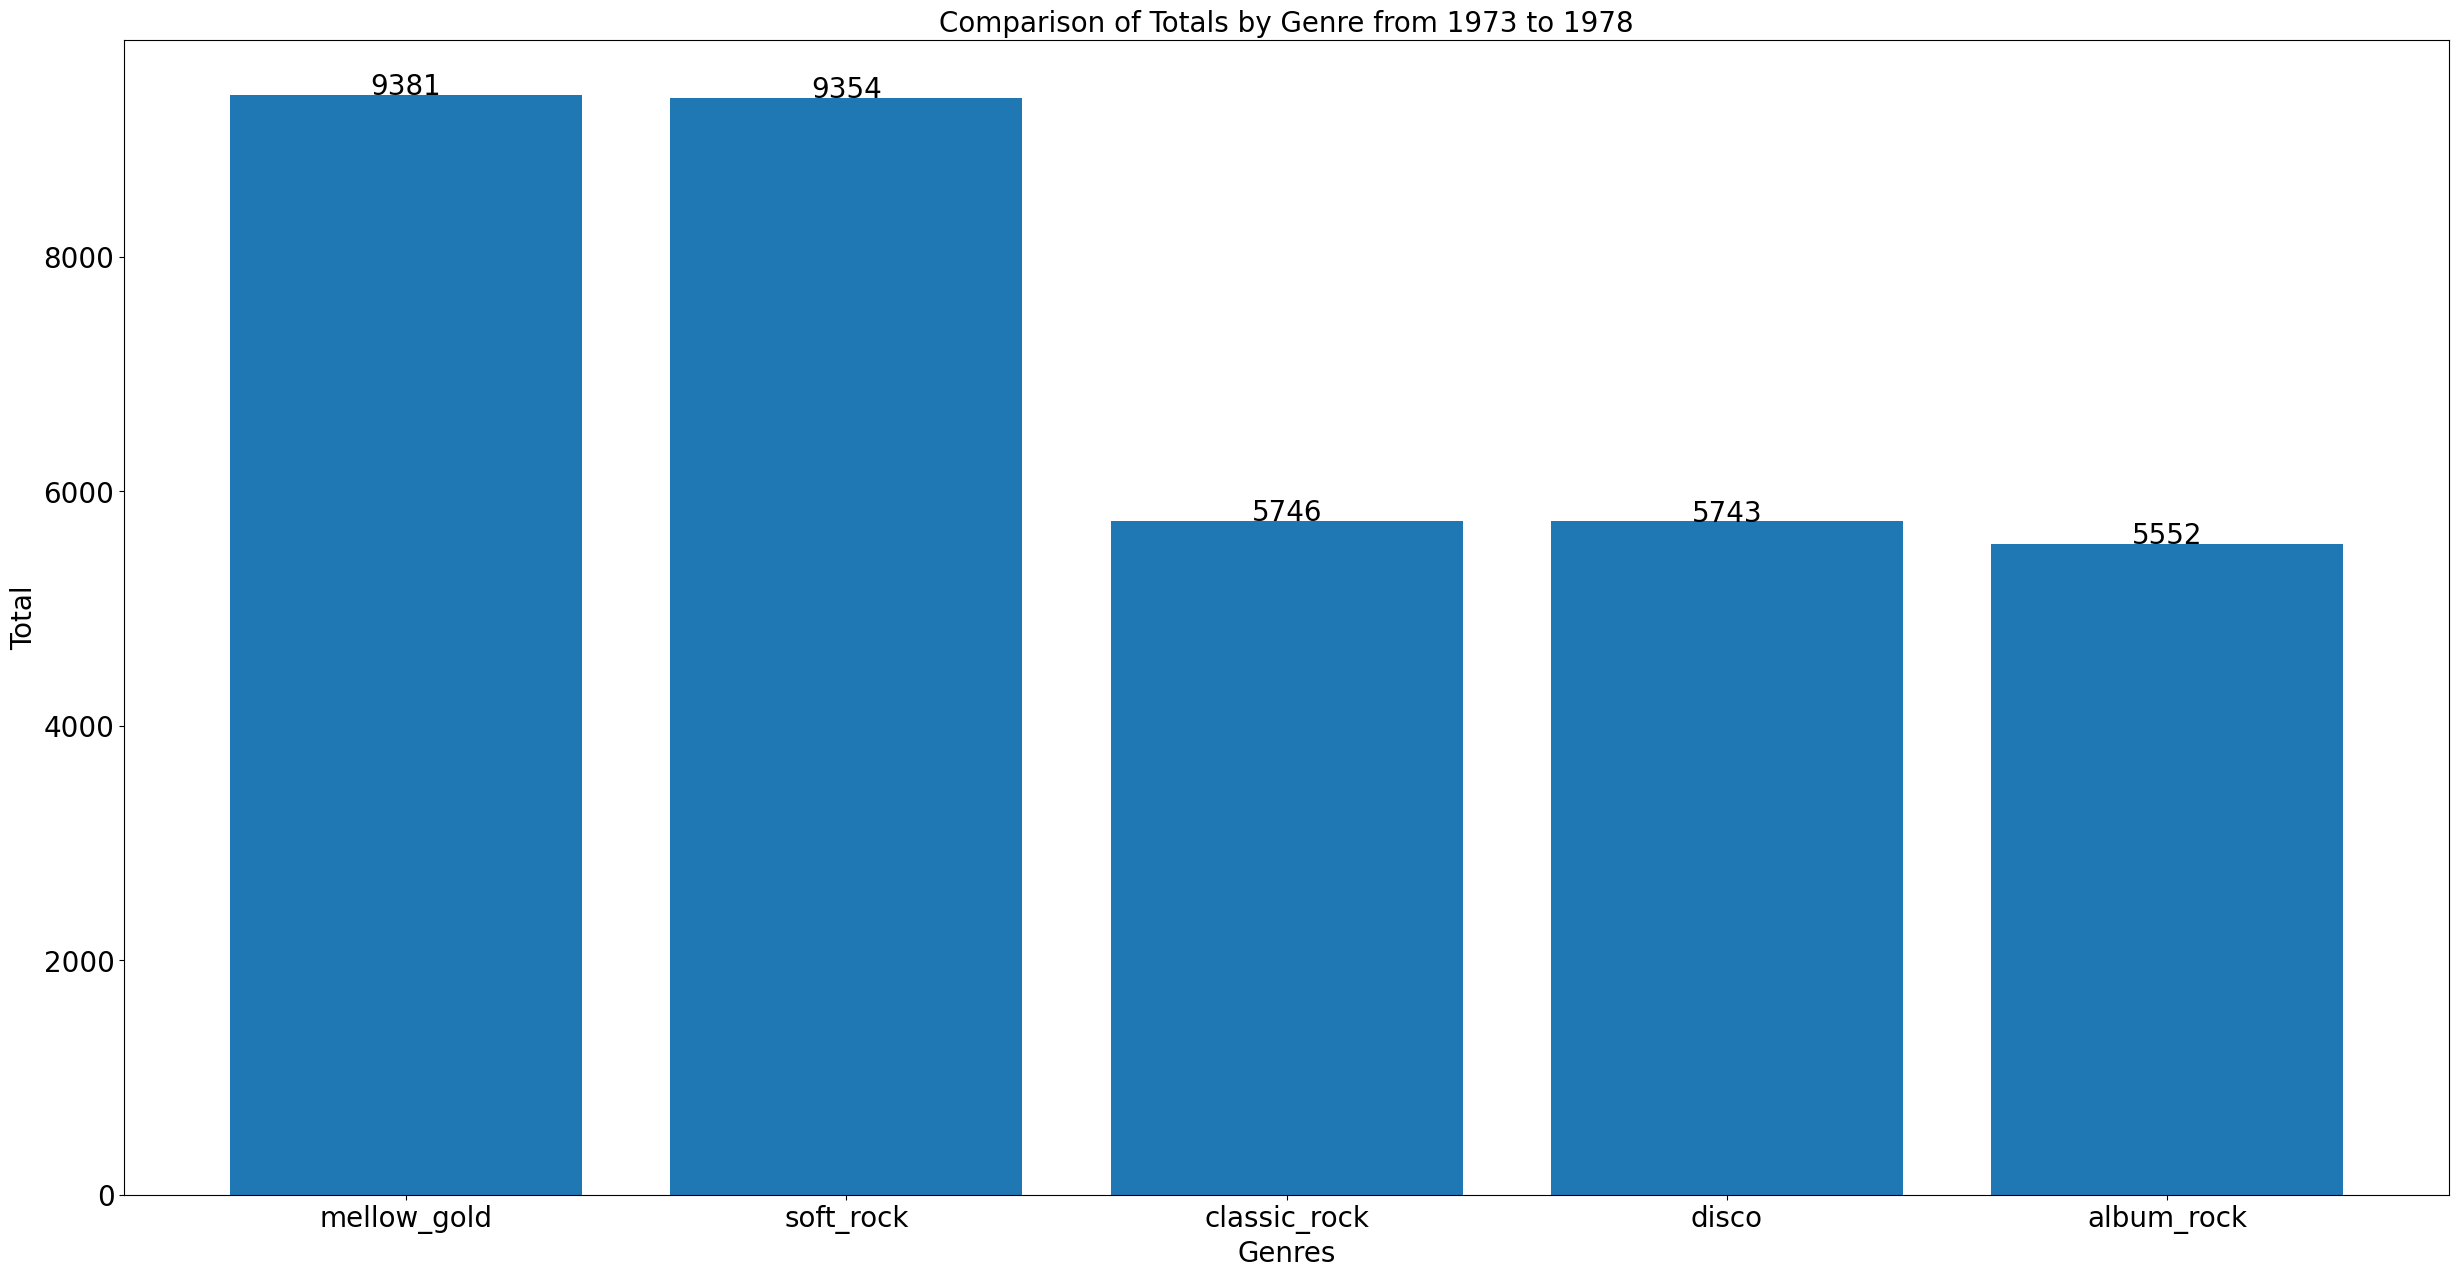

mellow_gold has this performers:B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song, Chicago with song (i've Been) Searchin' So Long, Andy Gibb with song (Love Is) Thicker Than Water, Elton John with song (Sartorial Eloquence) Don't Ya Wanna Play This Game No More?, Linda Ronstadt with song (She's A) Very Lovely Woman/The Long Way Around

soft_rock has this performers:B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song, Chicago with song (i've Been) Searchin' So Long, Andy Gibb with song (Love Is) Thicker Than Water, KC And The Sunshine Band with song (Shake, Shake, Shake) Shake Your Booty, Linda Ronstadt with song (She's A) Very Lovely Woman/The Long Way Around

classic_rock has this performers:The Rolling Stones with song (I Can't Get No) Satisfaction, Chicago with song (i've Been) Searchin' So Long, Paul Simon with song 50 Ways To Leave Your Lover, Ringo Starr with song A Dose Of Rock 'N' Roll, America with song A Hor

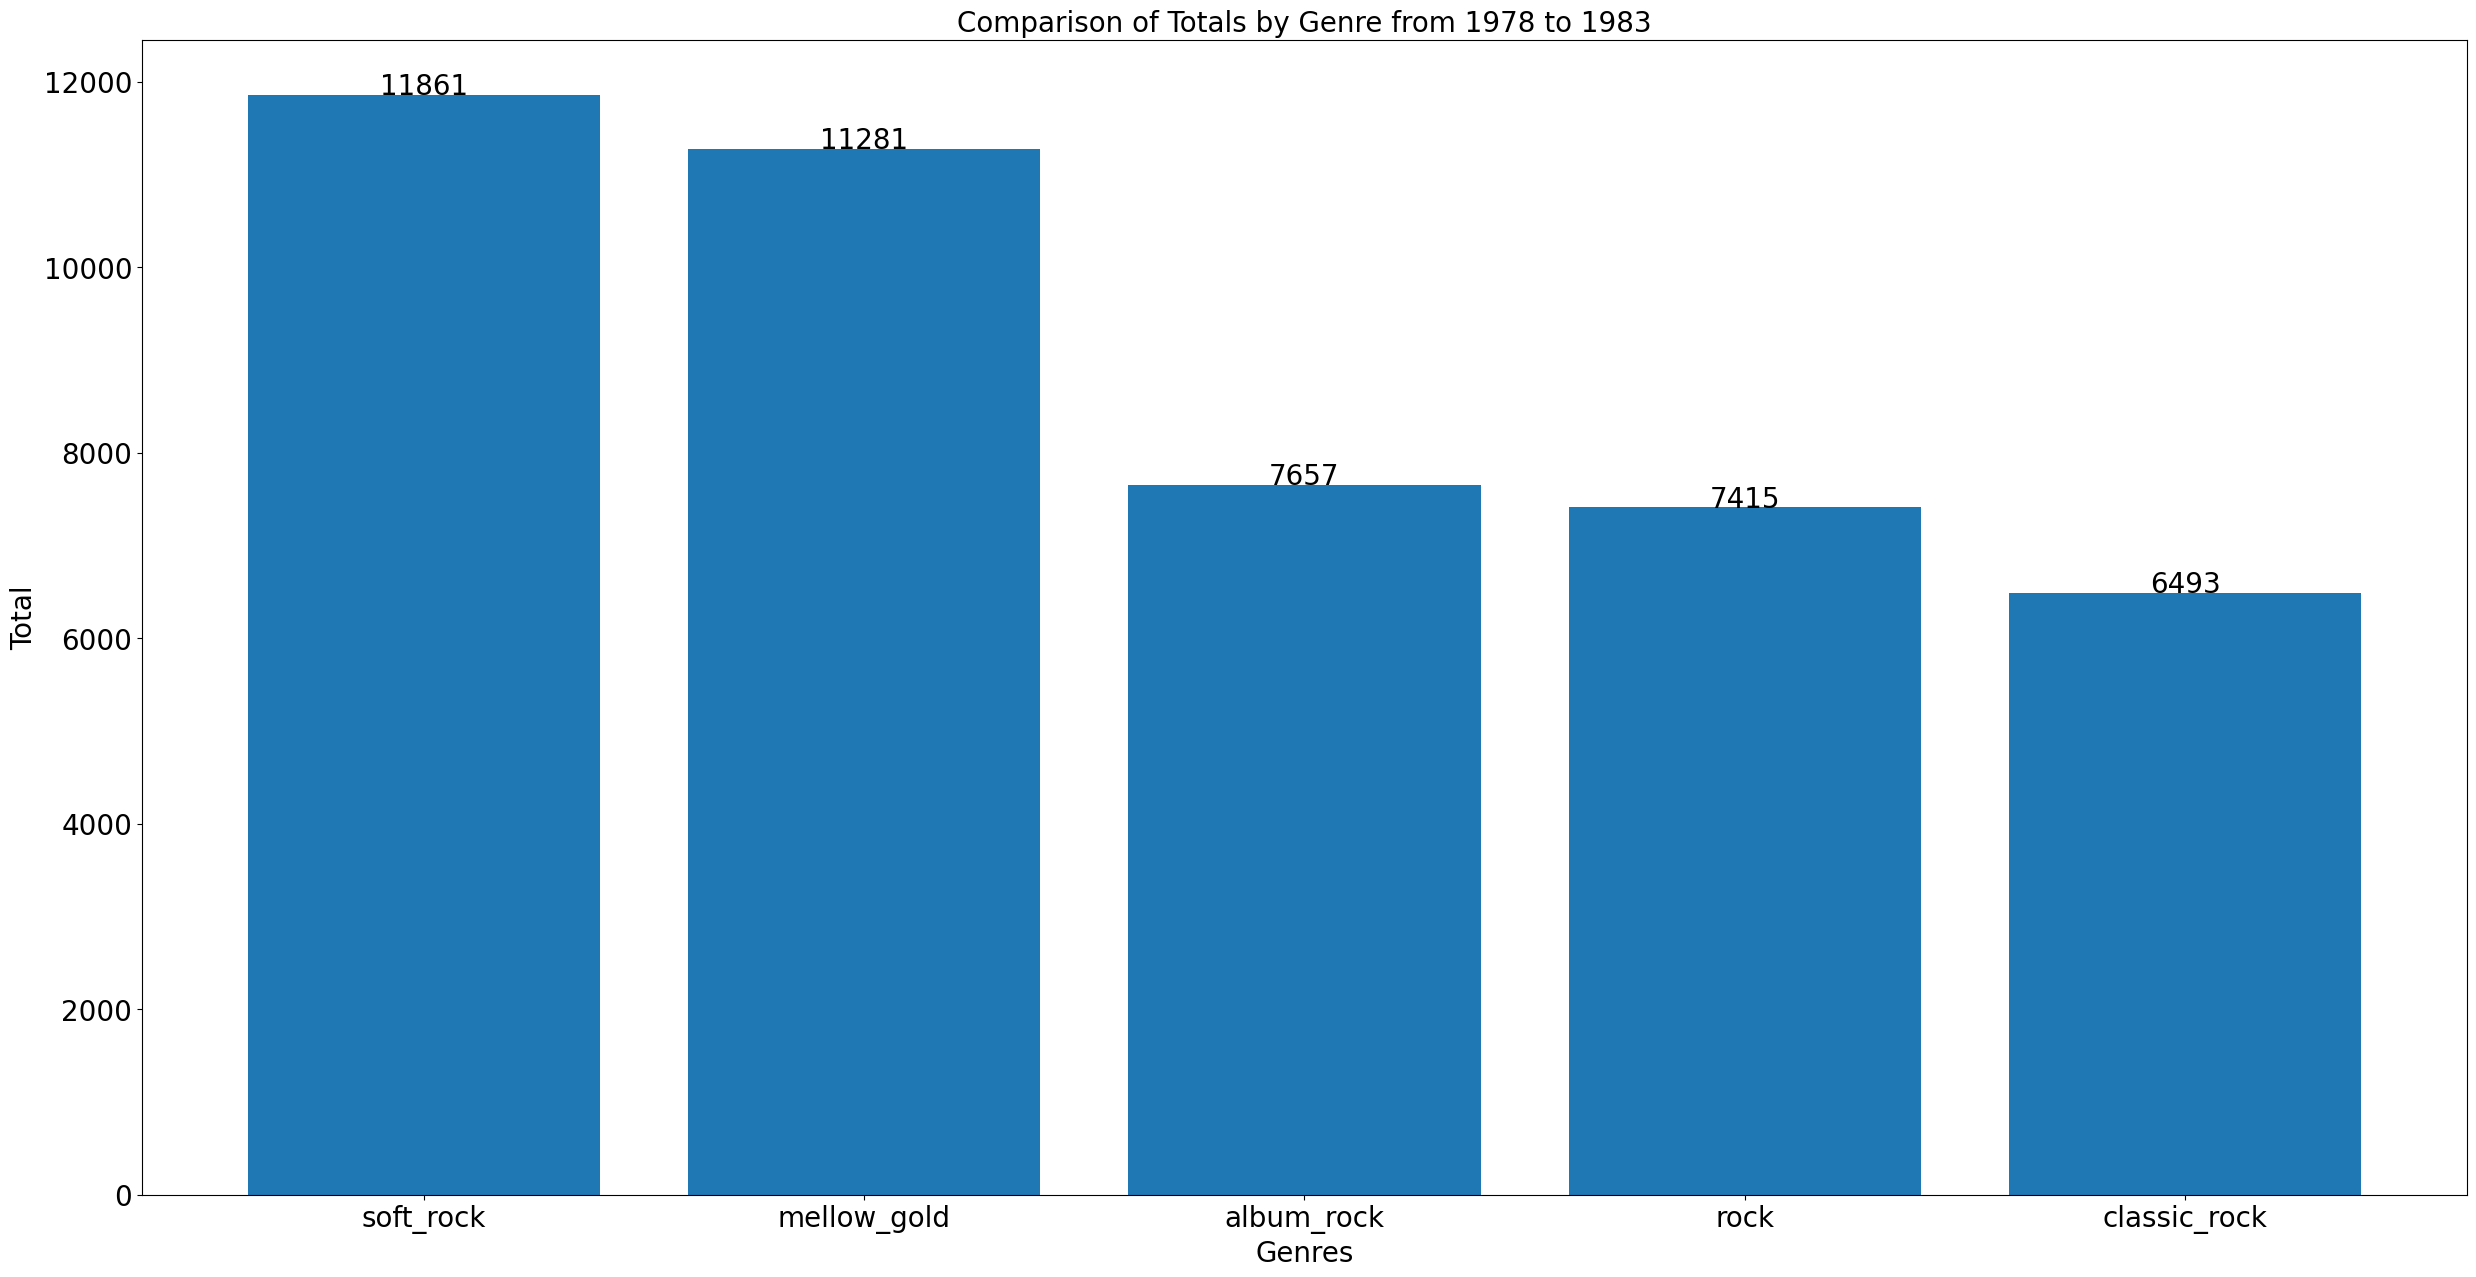

soft_rock has this performers:Chicago with song (i've Been) Searchin' So Long, Andy Gibb with song (Love Is) Thicker Than Water, KC And The Sunshine Band with song (Shake, Shake, Shake) Shake Your Booty, Bee Gees with song (The Lights Went Out In) Massachusetts, Toto with song 99

mellow_gold has this performers:Chicago with song (i've Been) Searchin' So Long, John Lennon with song (Just Like) Starting Over, Andy Gibb with song (Love Is) Thicker Than Water, Bee Gees with song (The Lights Went Out In) Massachusetts, Toto with song 99

album_rock has this performers:The Rolling Stones with song (I Can't Get No) Satisfaction, Chicago with song (i've Been) Searchin' So Long, John Lennon with song (Just Like) Starting Over, Toto with song 99, Christopher Cross with song A Chance For Heaven

rock has this performers:The Rolling Stones with song (I Can't Get No) Satisfaction, Chicago with song (i've Been) Searchin' So Long, John Lennon with song (Just Like) Starting Over, The Human League wit

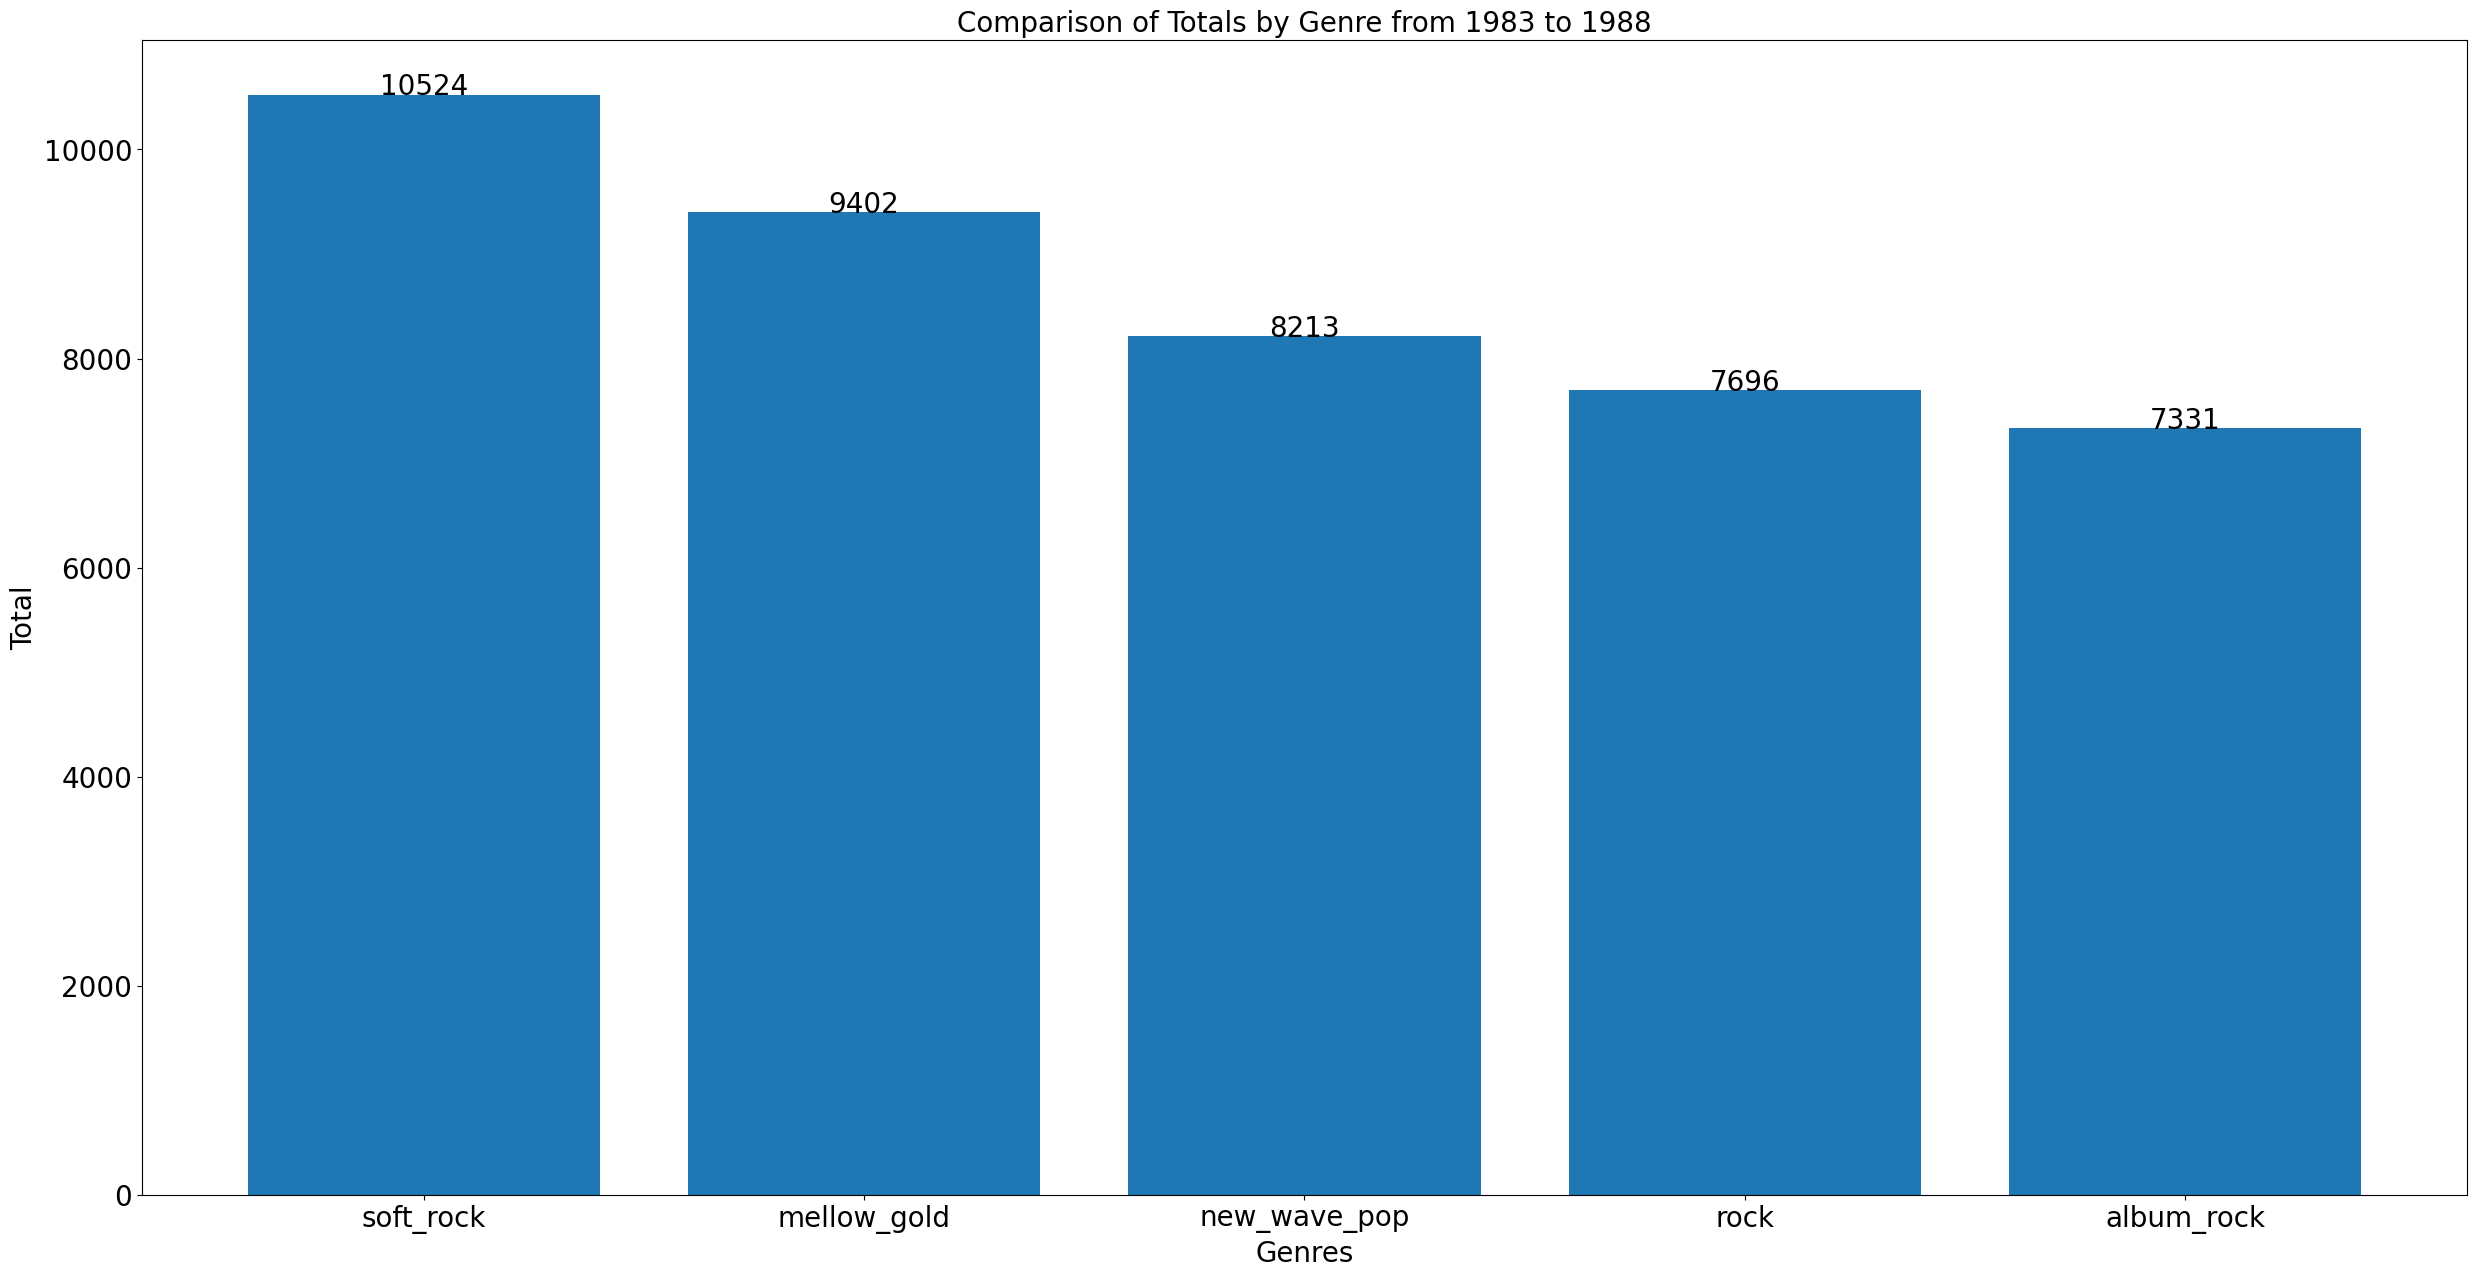

soft_rock has this performers:Cutting Crew with song (Between A) Rock And A Hard Place, Bryan Adams with song (Everything I Do) I Do It For You, Chicago with song (i've Been) Searchin' So Long, Bill Medley & Jennifer Warnes with song (I've Had) The Time Of My Life, Duran Duran with song (Reach Up For The) Sunrise

mellow_gold has this performers:Cutting Crew with song (Between A) Rock And A Hard Place, Bryan Adams with song (Everything I Do) I Do It For You, Chicago with song (i've Been) Searchin' So Long, Huey Lewis & The News with song (She's) Some Kind Of Wonderful, Toto with song 99

new_wave_pop has this performers:Cutting Crew with song (Between A) Rock And A Hard Place, The Human League with song (Keep Feeling) Fascination, Duran Duran with song (Reach Up For The) Sunrise, Huey Lewis & The News with song (She's) Some Kind Of Wonderful, Gloria Estefan & Miami Sound Machine with song 01-02-03

rock has this performers:Bryan Adams with song (Everything I Do) I Do It For You, Chicag

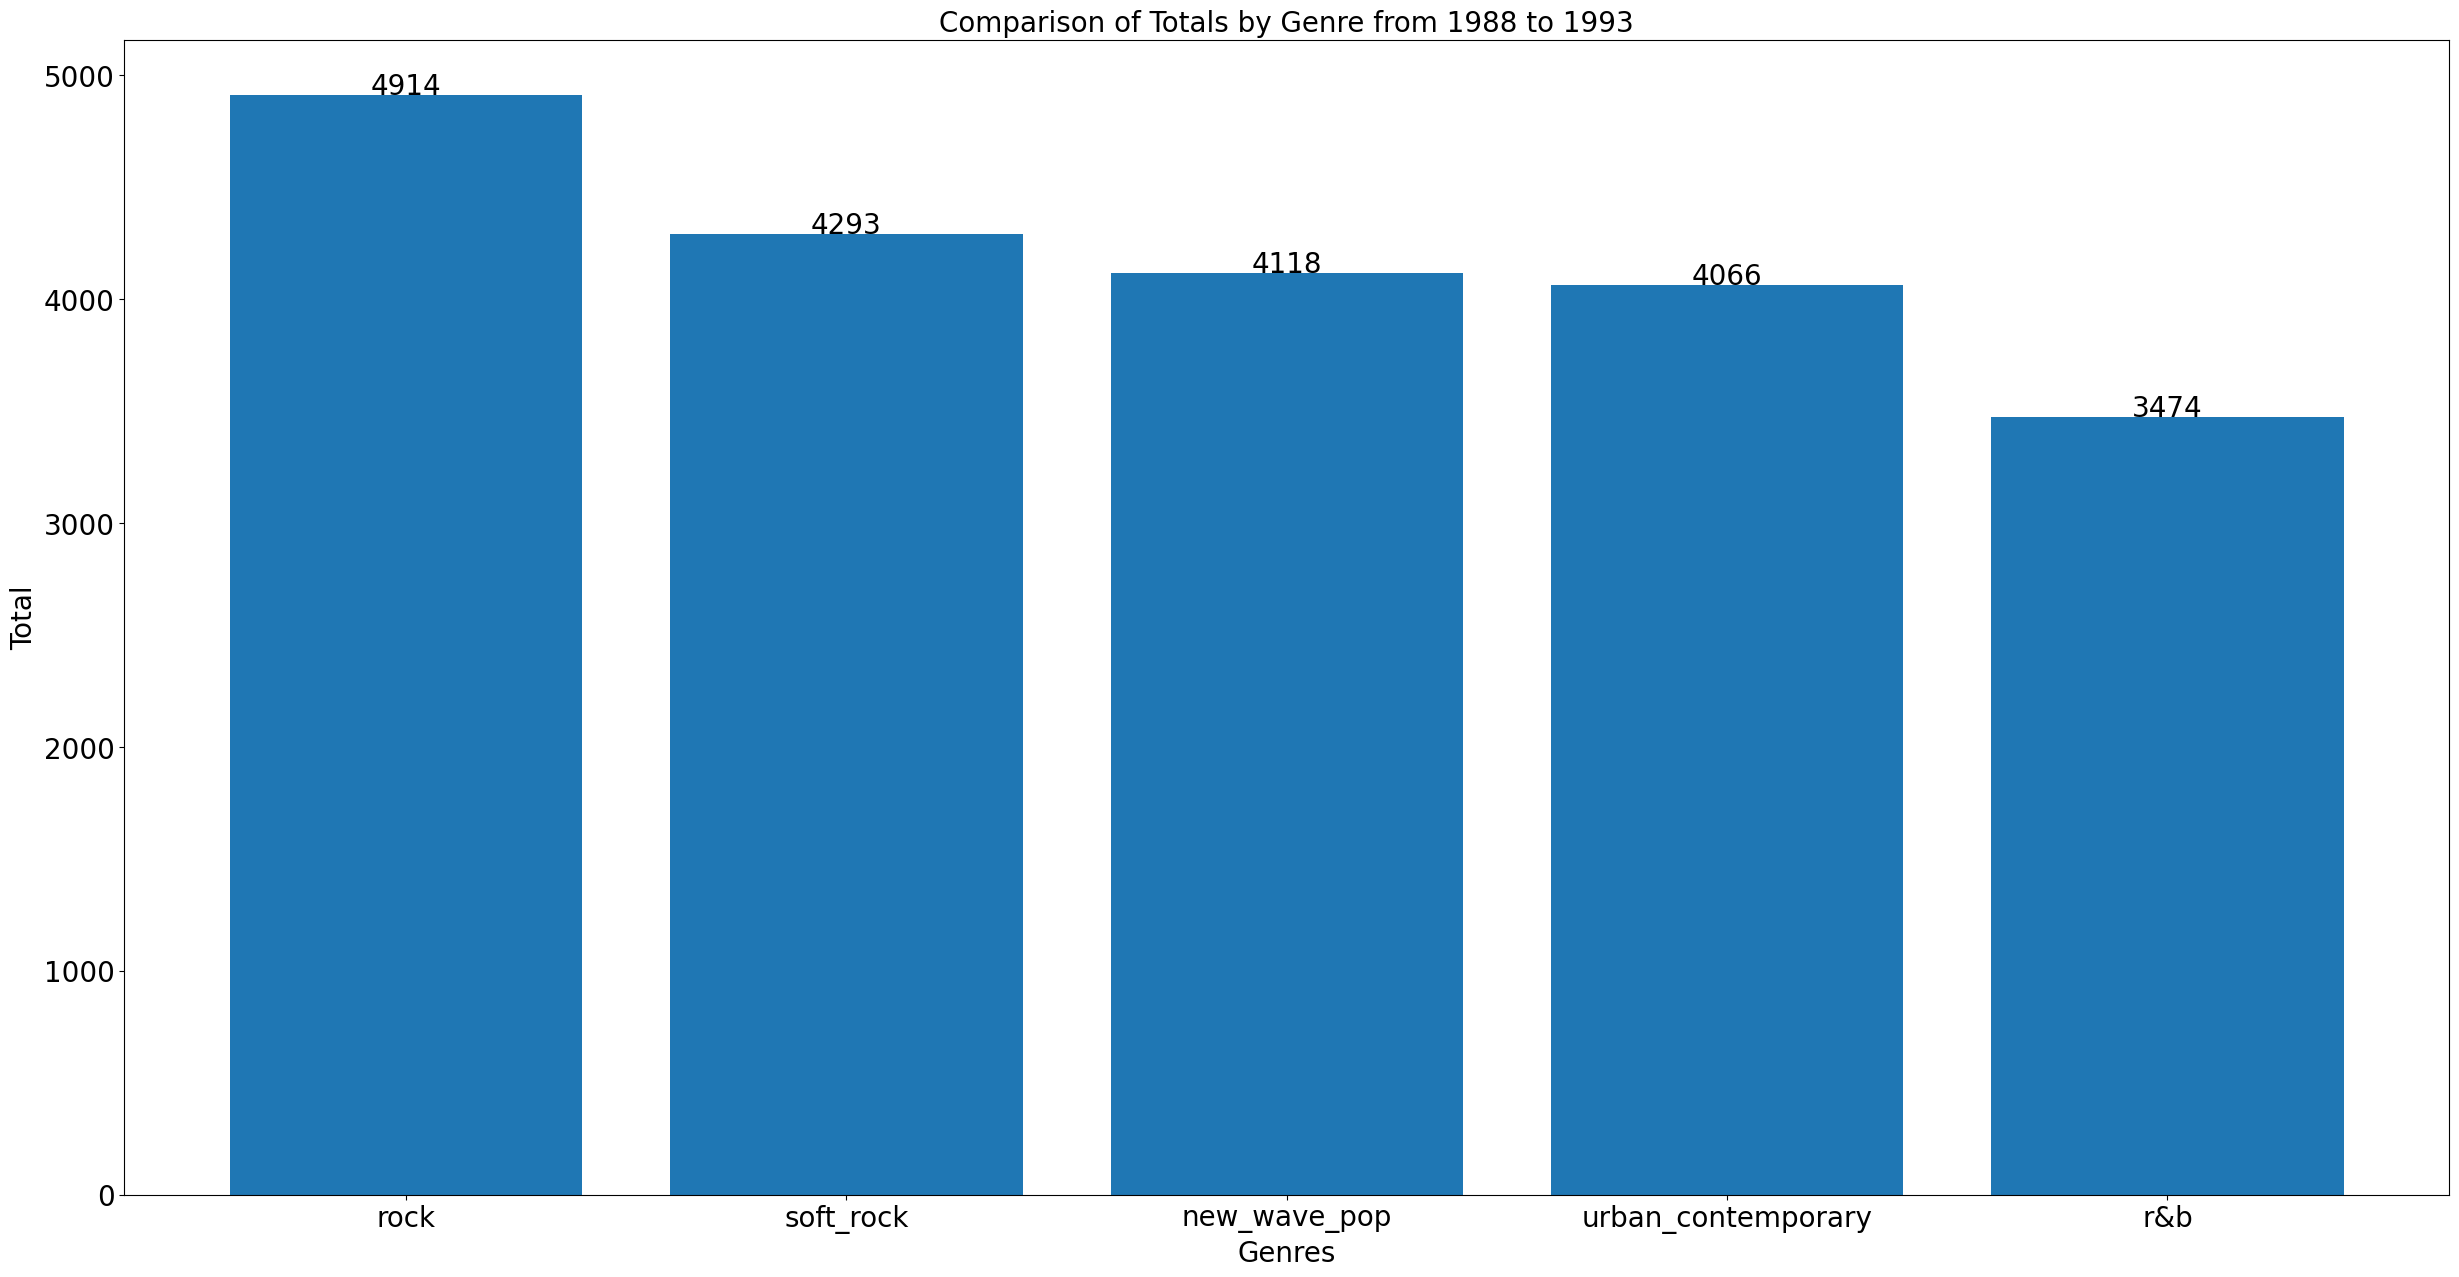

rock has this performers:Bryan Adams with song (Everything I Do) I Do It For You, Chicago with song (i've Been) Searchin' So Long, Bon Jovi with song (You Want To) Make A Memory, The Beach Boys with song 409, Billy Joel with song A Matter Of Trust

soft_rock has this performers:Bryan Adams with song (Everything I Do) I Do It For You, Chicago with song (i've Been) Searchin' So Long, Michael Bolton with song (Sittin' On) The Dock Of The Bay, Gloria Estefan & Miami Sound Machine with song 01-02-03, George Michael with song A Different Corner

new_wave_pop has this performers:Paula Abdul with song (It's Just) The Way That You Love Me, Gloria Estefan & Miami Sound Machine with song 01-02-03, George Michael with song A Different Corner, Cheap Trick with song Ain't That A Shame, Rick Astley with song Ain't Too Proud To Beg

urban_contemporary has this performers:Paula Abdul with song (It's Just) The Way That You Love Me, Boyz II Men with song 4 Seasons Of Loneliness, Peabo Bryson & Regina Bel

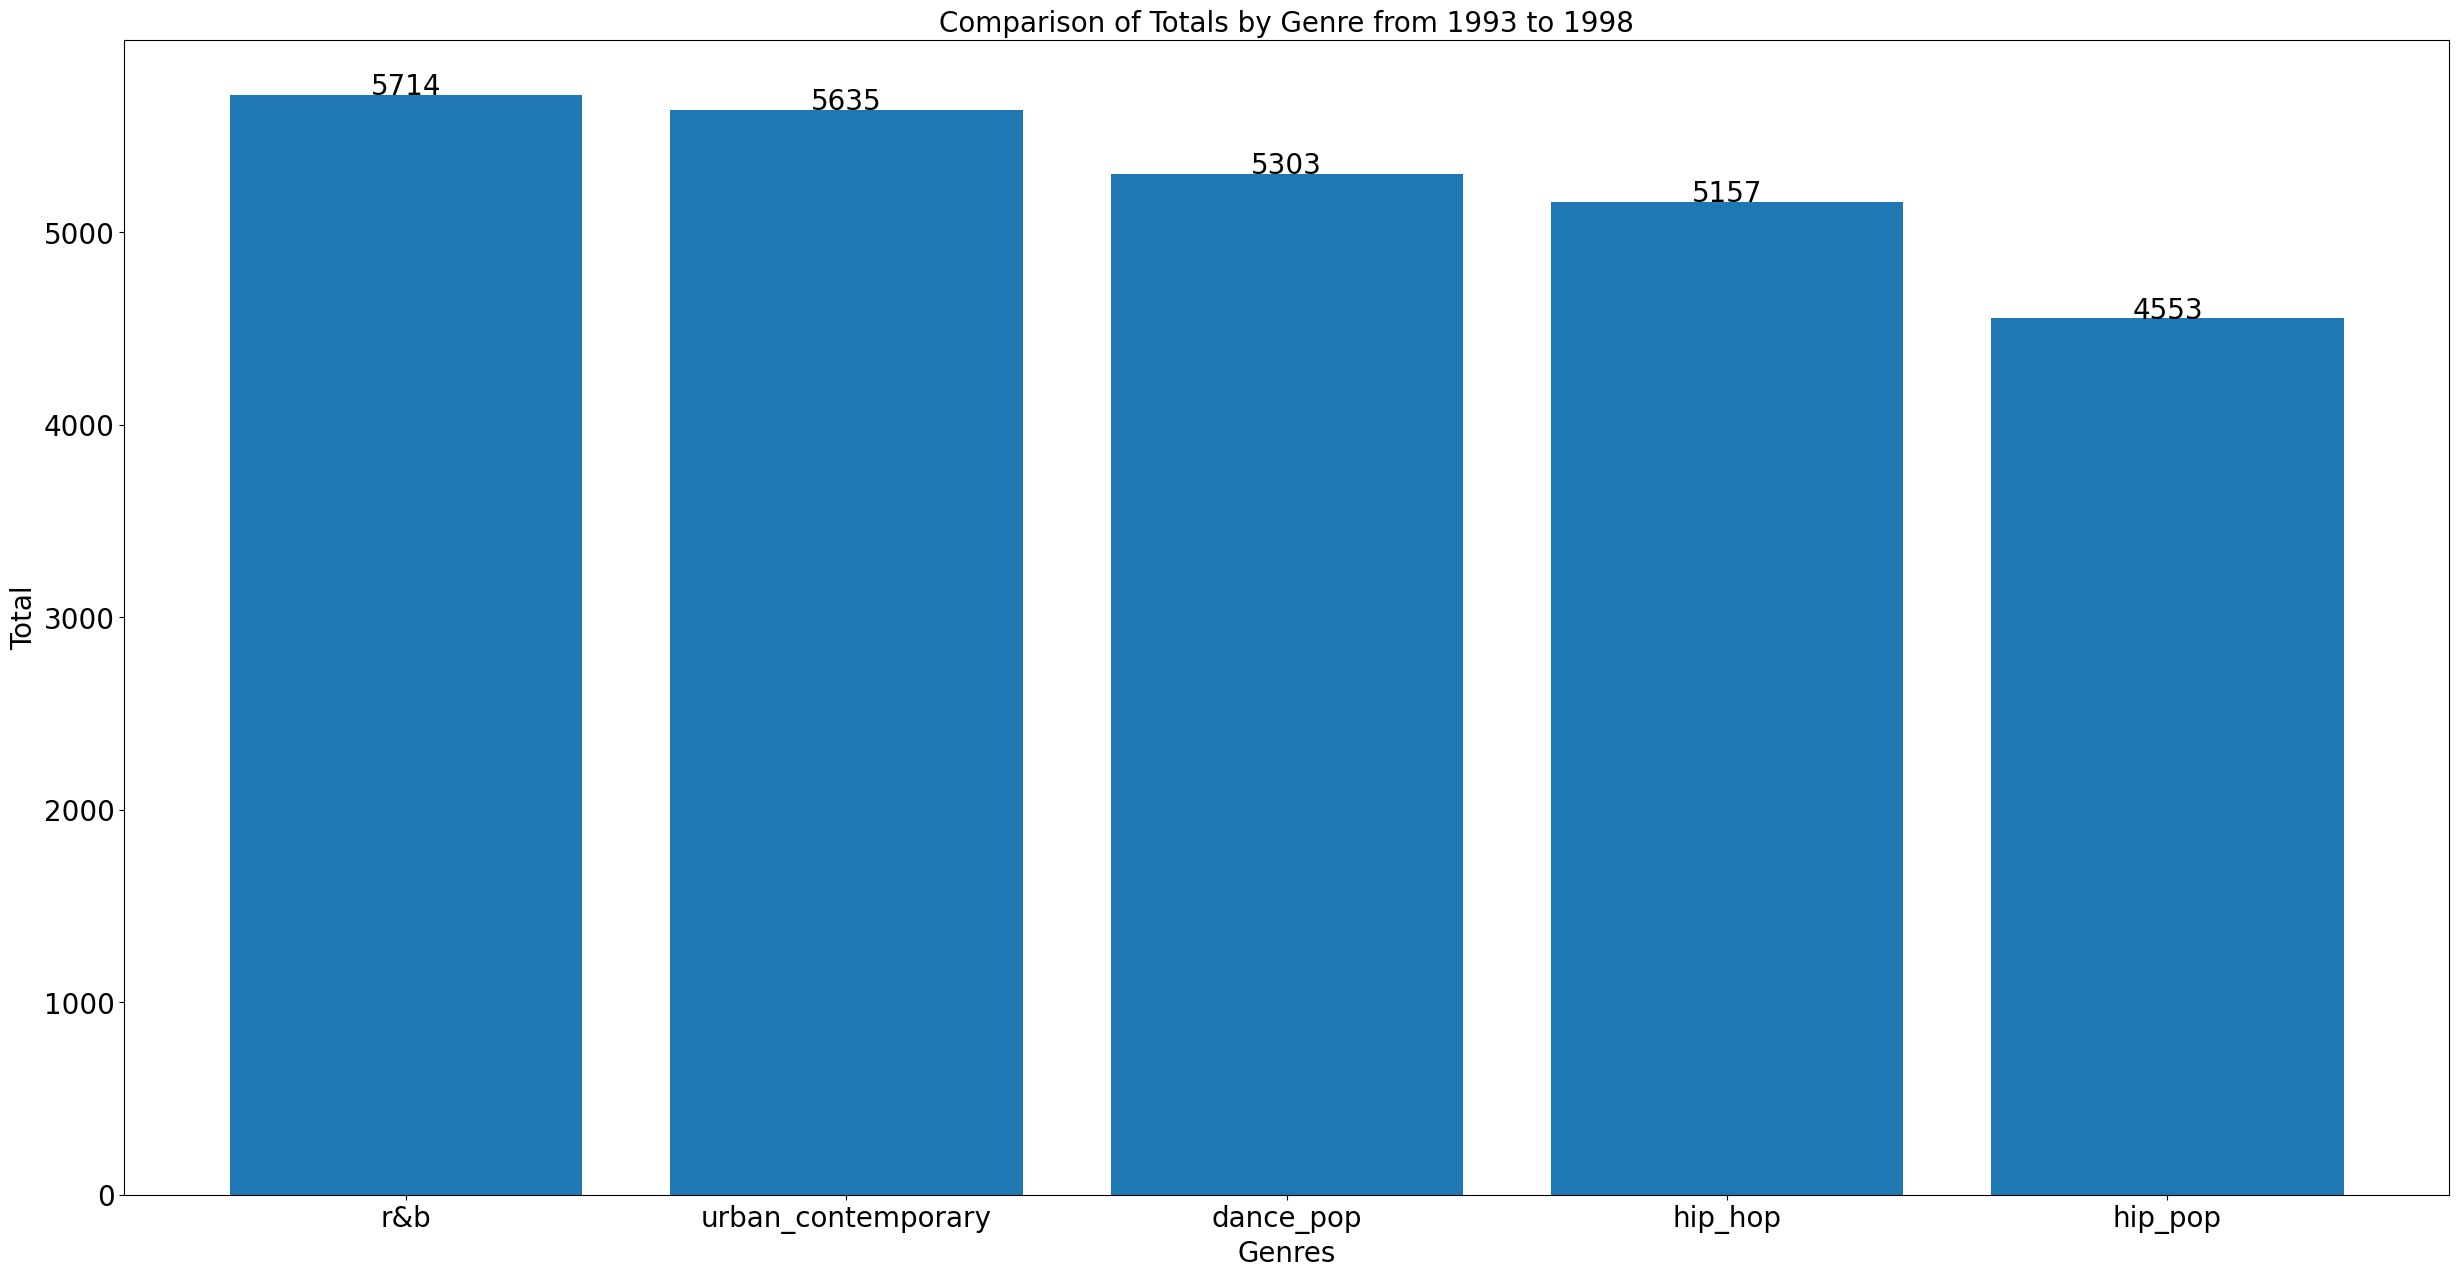

r&b has this performers:All-4-One with song (She's Got) Skillz, Boyz II Men with song 4 Seasons Of Loneliness, Janet Jackson with song Again, TLC with song Ain't 2 Proud 2 Beg, Monica with song All Eyez On Me

urban_contemporary has this performers:All-4-One with song (She's Got) Skillz, Boyz II Men with song 4 Seasons Of Loneliness, Peabo Bryson & Regina Belle with song A Whole New World (Aladdin's Theme), Janet Jackson with song Again, TLC with song Ain't 2 Proud 2 Beg

dance_pop has this performers:Celine Dion with song (If There Was) Any Other Way, All-4-One with song (She's Got) Skillz, Spice Girls with song 2 Become 1, Janet Jackson with song Again, TLC with song Ain't 2 Proud 2 Beg

hip_hop has this performers:Bone Thugs-N-Harmony with song 1st Of Tha Month, TLC with song Ain't 2 Proud 2 Beg, Monica with song All Eyez On Me, SWV with song Always On My Mind, The Notorious B.I.G. with song Big Poppa/Warning

hip_pop has this performers:Janet Jackson with song Again, TLC with song 

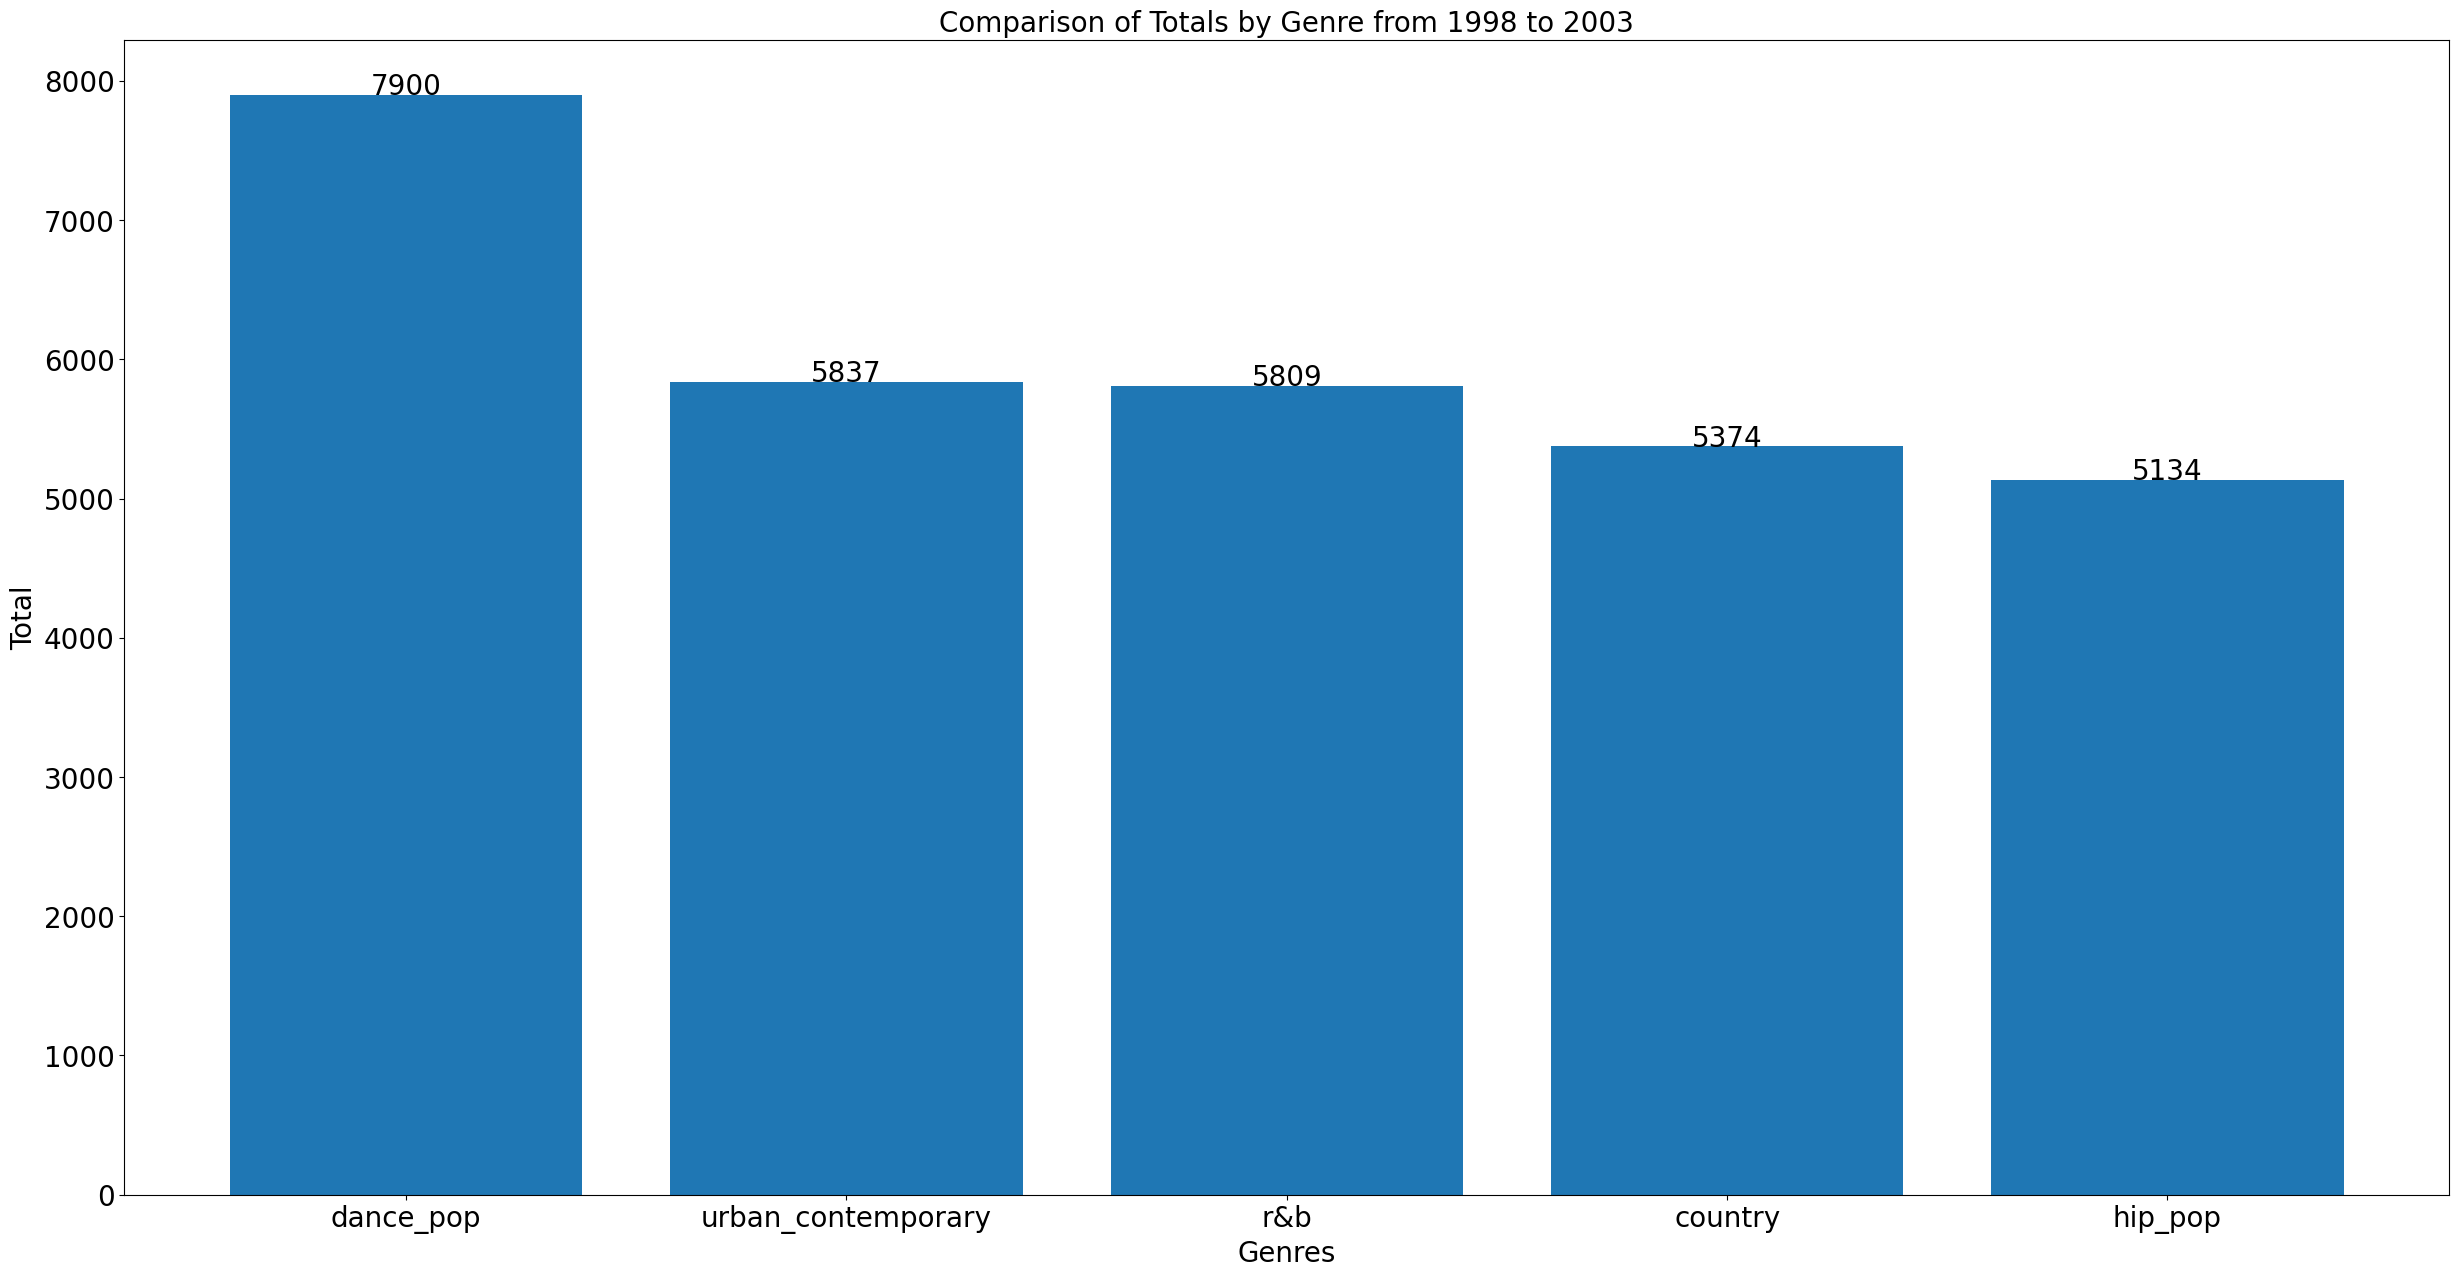

dance_pop has this performers:Britney Spears with song ...Baby One More Time, Nelly with song (Hot S**t) Country Grammar, Celine Dion with song (If There Was) Any Other Way, Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover"), Kelly Clarkson with song A Moment Like This

urban_contemporary has this performers:Nelly with song (Hot S**t) Country Grammar, Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover"), Alicia Keys with song A Woman's Worth, Aaliyah with song Age Ain't Nothing But A Number, TLC with song Ain't 2 Proud 2 Beg

r&b has this performers:Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover"), Alicia Keys with song A Woman's Worth, Aaliyah with song Age Ain't Nothing But A Number, TLC with song Ain't 2 Proud 2 Beg, Christina Aguilera with song Ain't No Other Man

country has this performers:Lonestar with song Amazed

hip_pop has this performers:Mary J. Blig

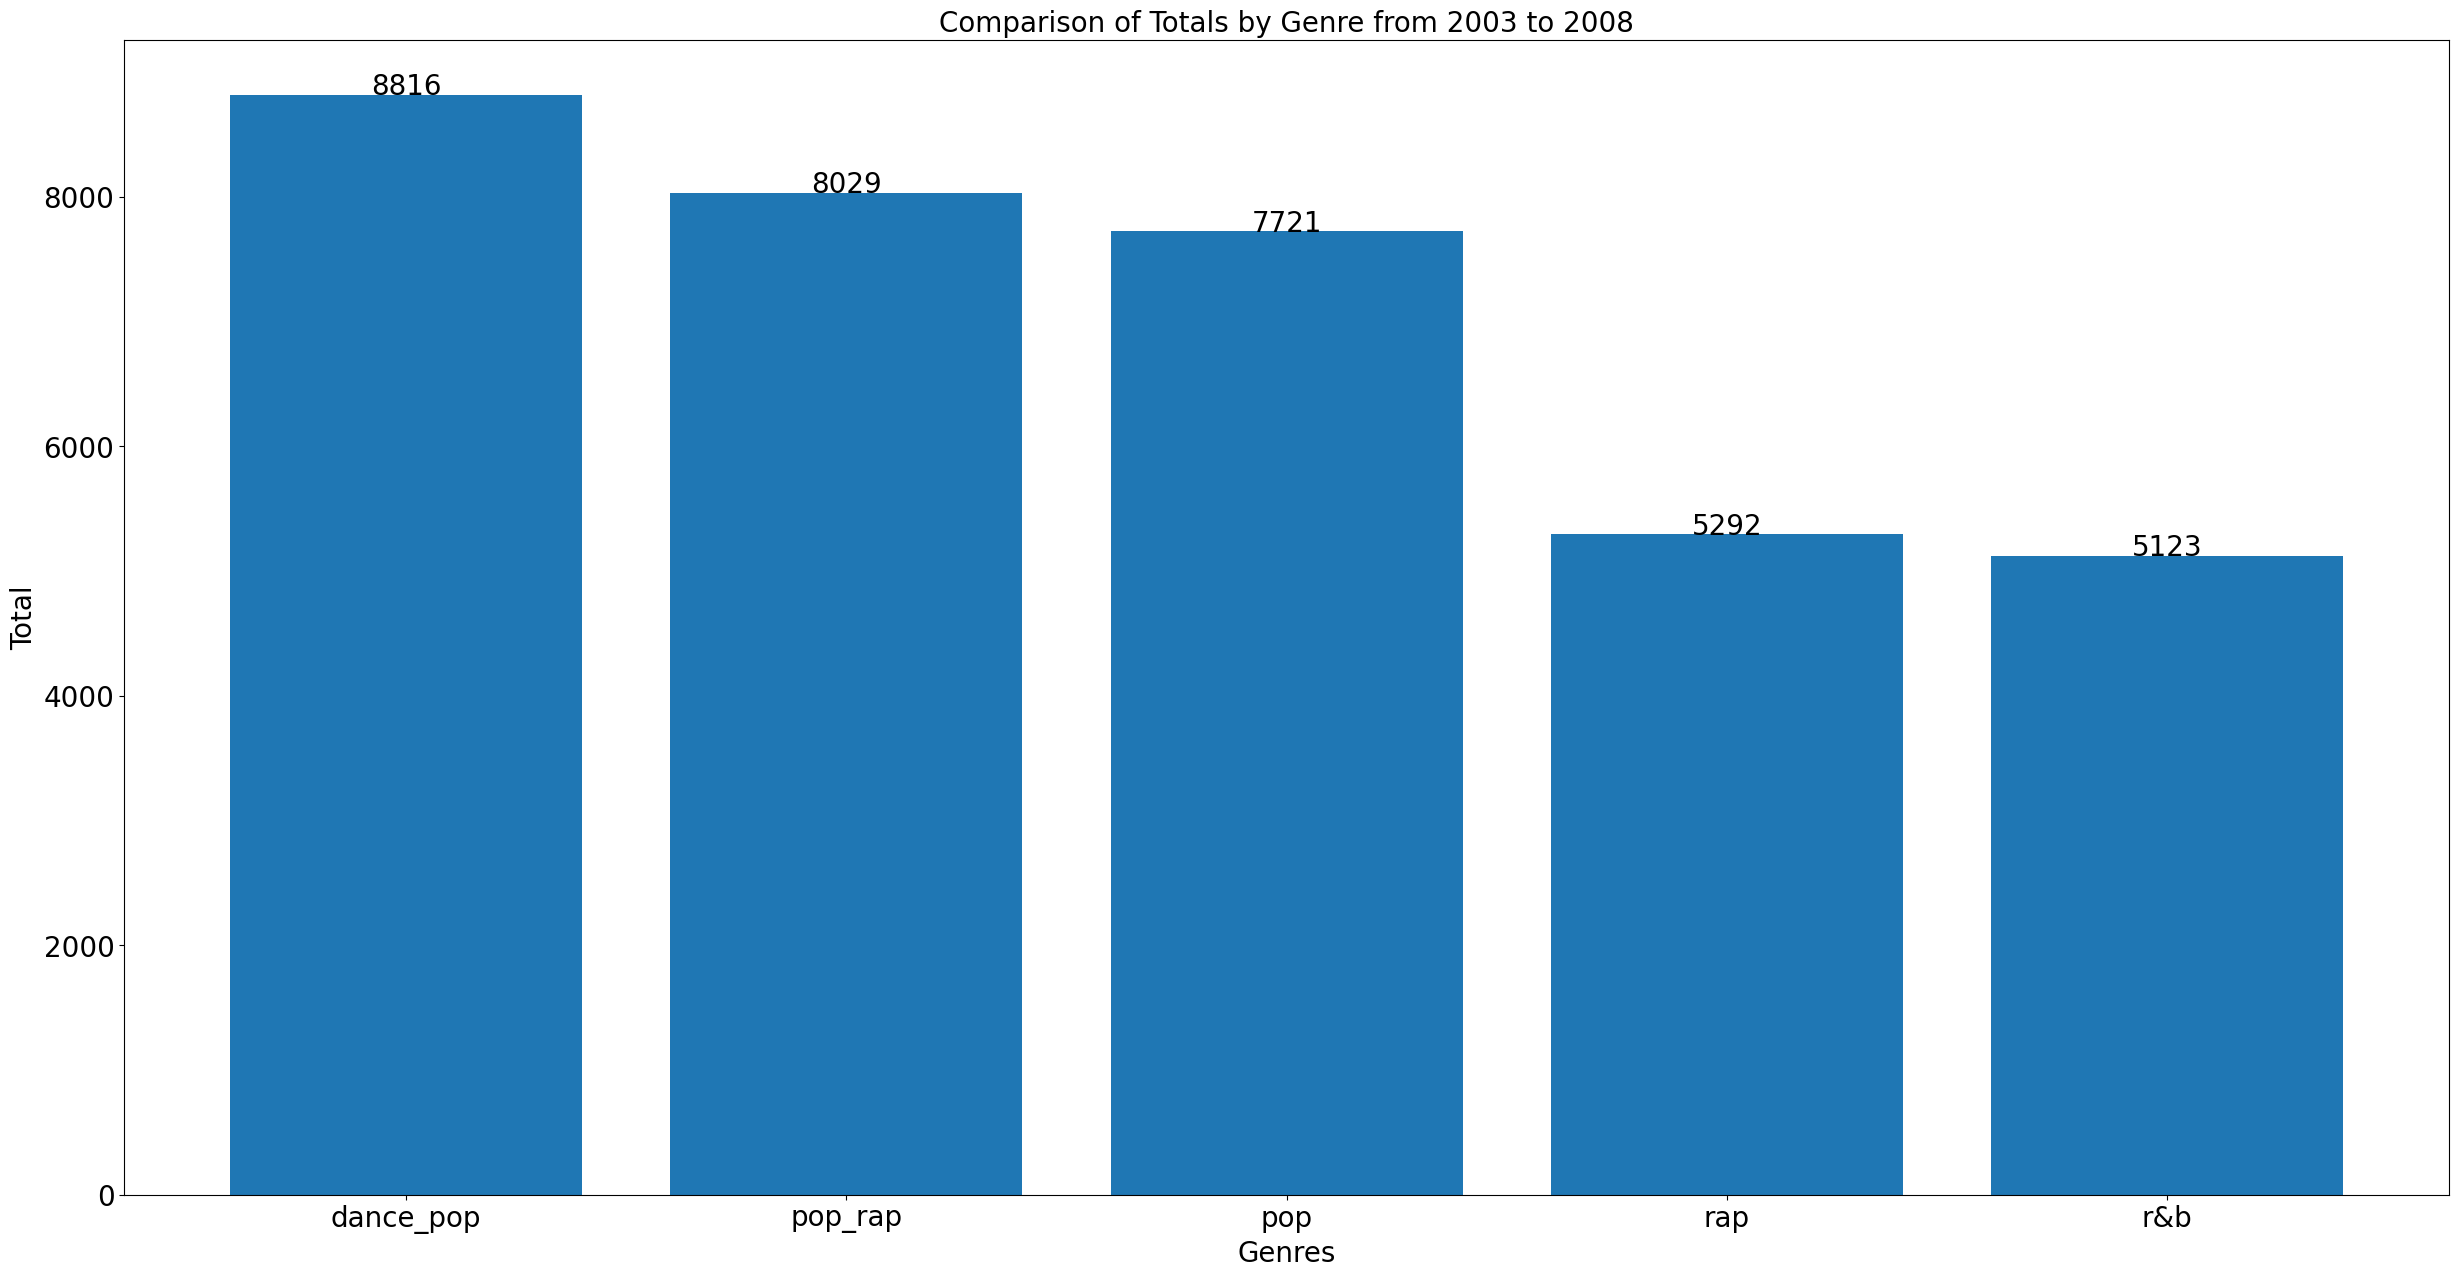

dance_pop has this performers:Britney Spears with song ...Baby One More Time, Beyonce with song 1+1, T.I. with song 24's, Gwen Stefani with song 4 In The Morning, P!nk with song A Million Dreams

pop_rap has this performers:Beyonce with song 1+1, 50 Cent Featuring Nate Dogg with song 21 Questions, T.I. with song 24's, Nelly Furtado with song All Good Things (Come To An End), Jennifer Lopez Featuring LL Cool J with song All I Have

pop has this performers:Britney Spears with song ...Baby One More Time, Plain White T's with song 1, 2, 3, 4, Beyonce with song 1+1, James Blunt with song 1973, Gwen Stefani with song 4 In The Morning

rap has this performers:50 Cent Featuring Nate Dogg with song 21 Questions, T.I. with song 24's, Eminem with song 25 To Life, Kanye West with song All Mine, OutKast with song ATLiens

r&b has this performers:Beyonce with song 1+1, Alicia Keys with song A Woman's Worth, Mariah Carey with song All I Want For Christmas Is You, Rihanna with song American Oxygen, Be

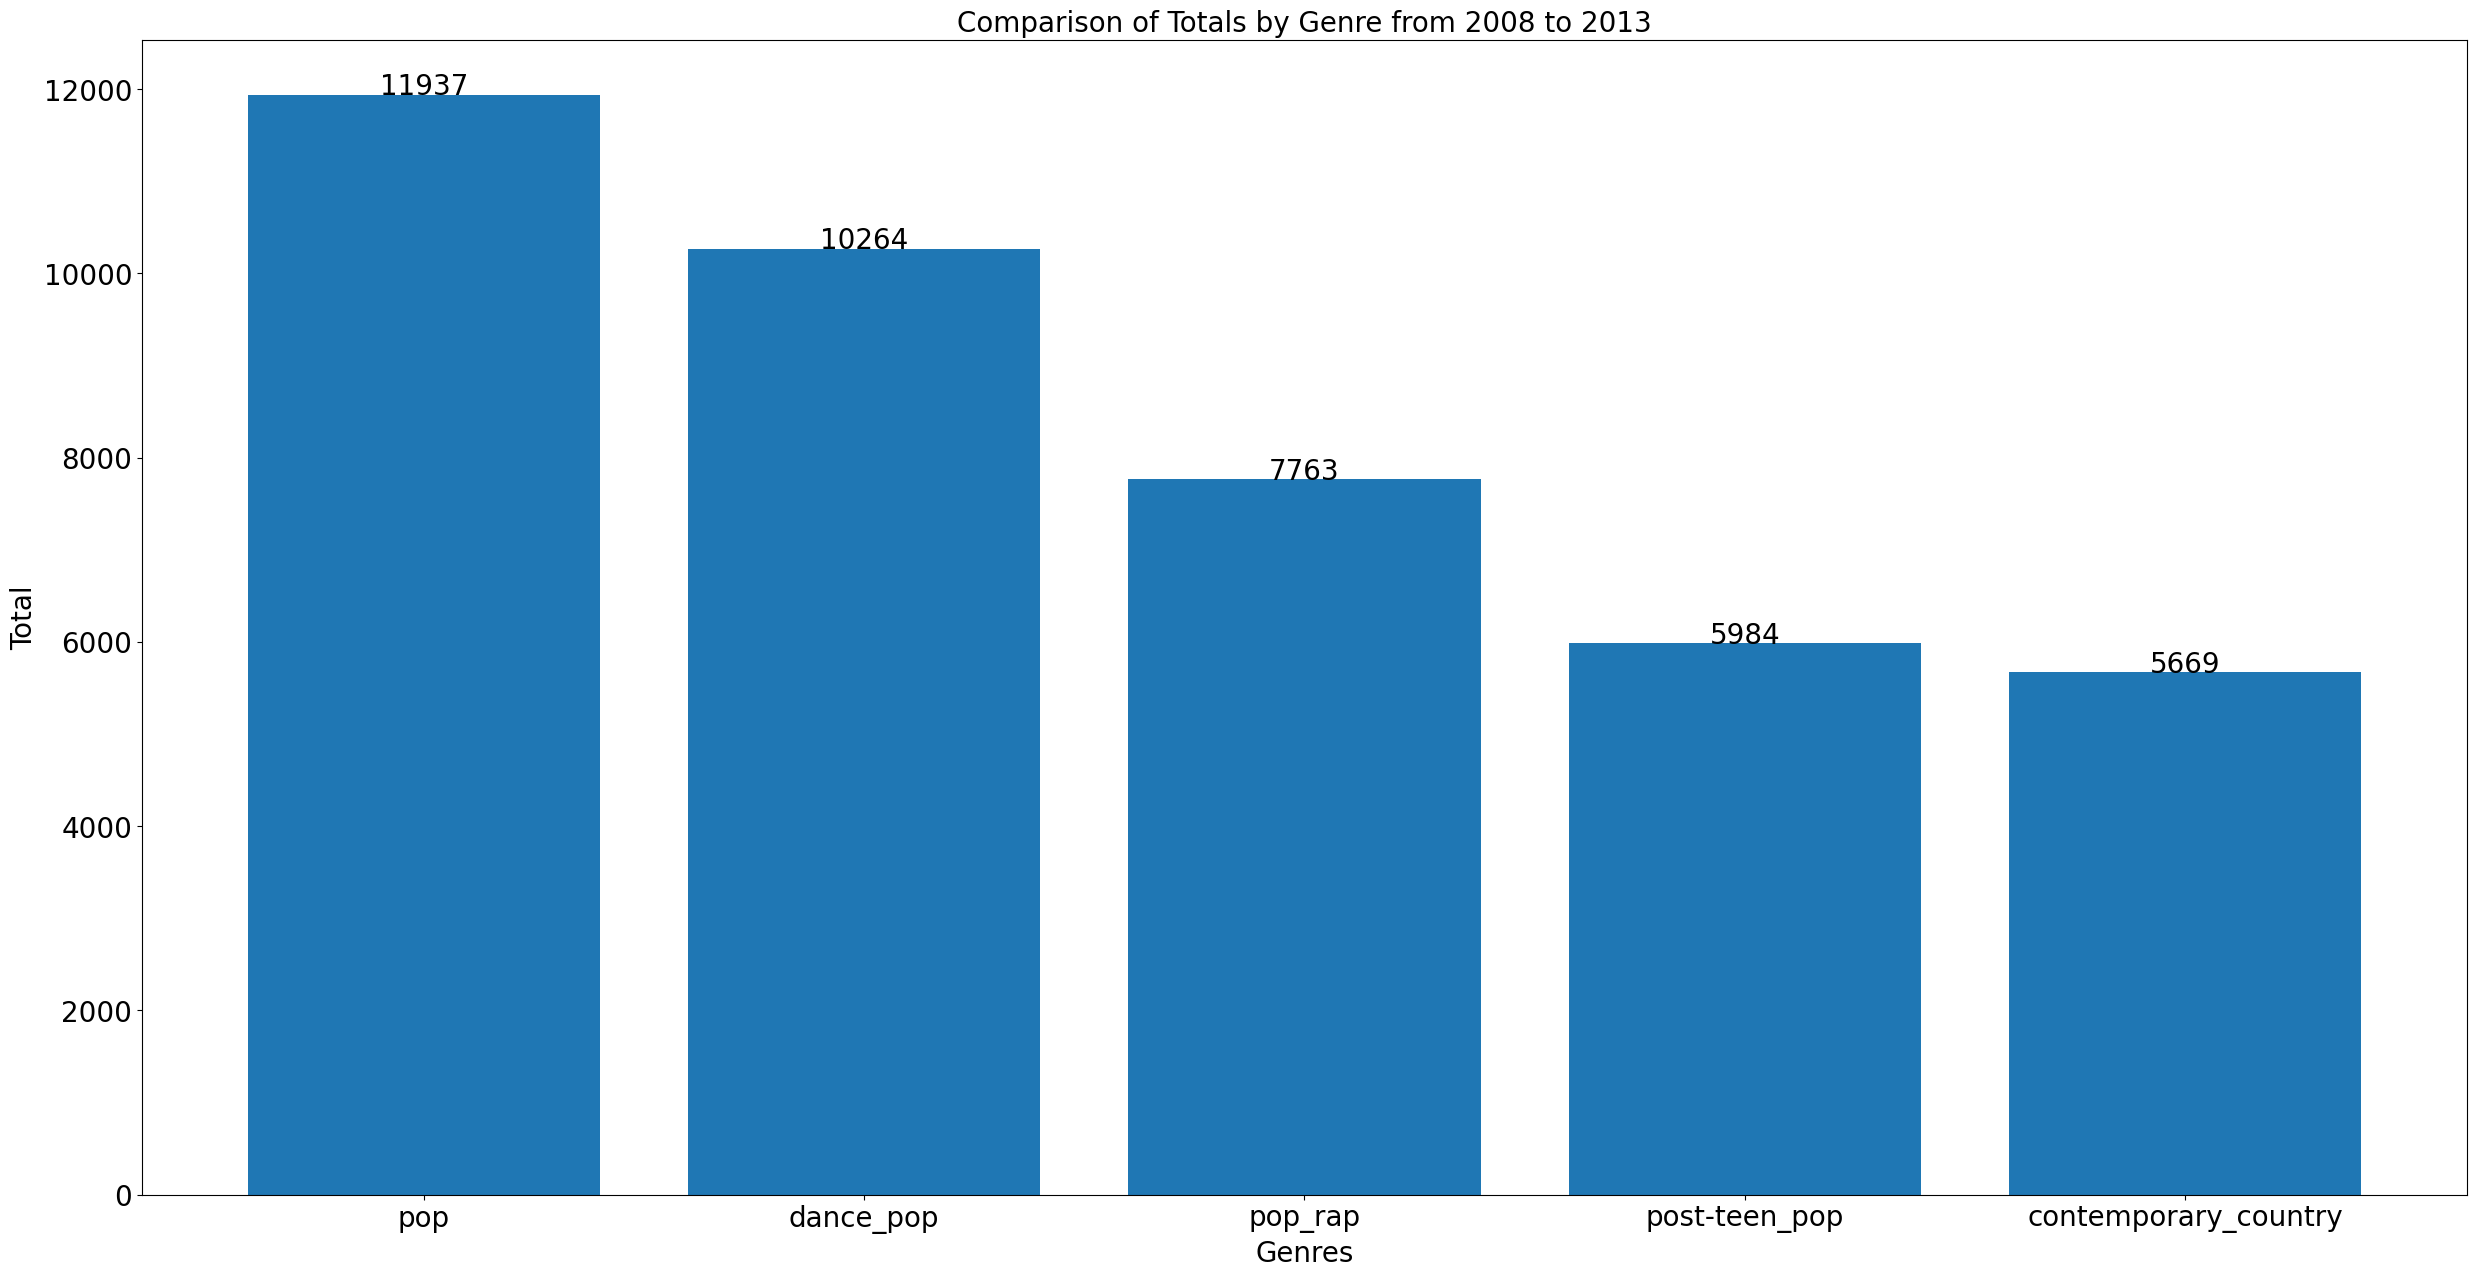

pop has this performers:Britney Spears with song ...Baby One More Time, Taylor Swift with song ...Ready For It?, Beyonce with song 1+1, Bruno Mars with song 24K Magic, Miley Cyrus with song 7 Things

dance_pop has this performers:Britney Spears with song ...Baby One More Time, Beyonce with song 1+1, T.I. with song 24's, Bruno Mars with song 24K Magic, Miley Cyrus with song 7 Things

pop_rap has this performers:Beyonce with song 1+1, T.I. with song 24's, Wiz Khalifa with song Black And Yellow, The Black Eyed Peas with song Boom Boom Pow, Taio Cruz Featuring Ludacris with song Break Your Heart

post-teen_pop has this performers:Britney Spears with song ...Baby One More Time, Taylor Swift with song ...Ready For It?, Miley Cyrus with song 7 Things, P!nk with song A Million Dreams, Kelly Clarkson with song A Moment Like This

contemporary_country has this performers:



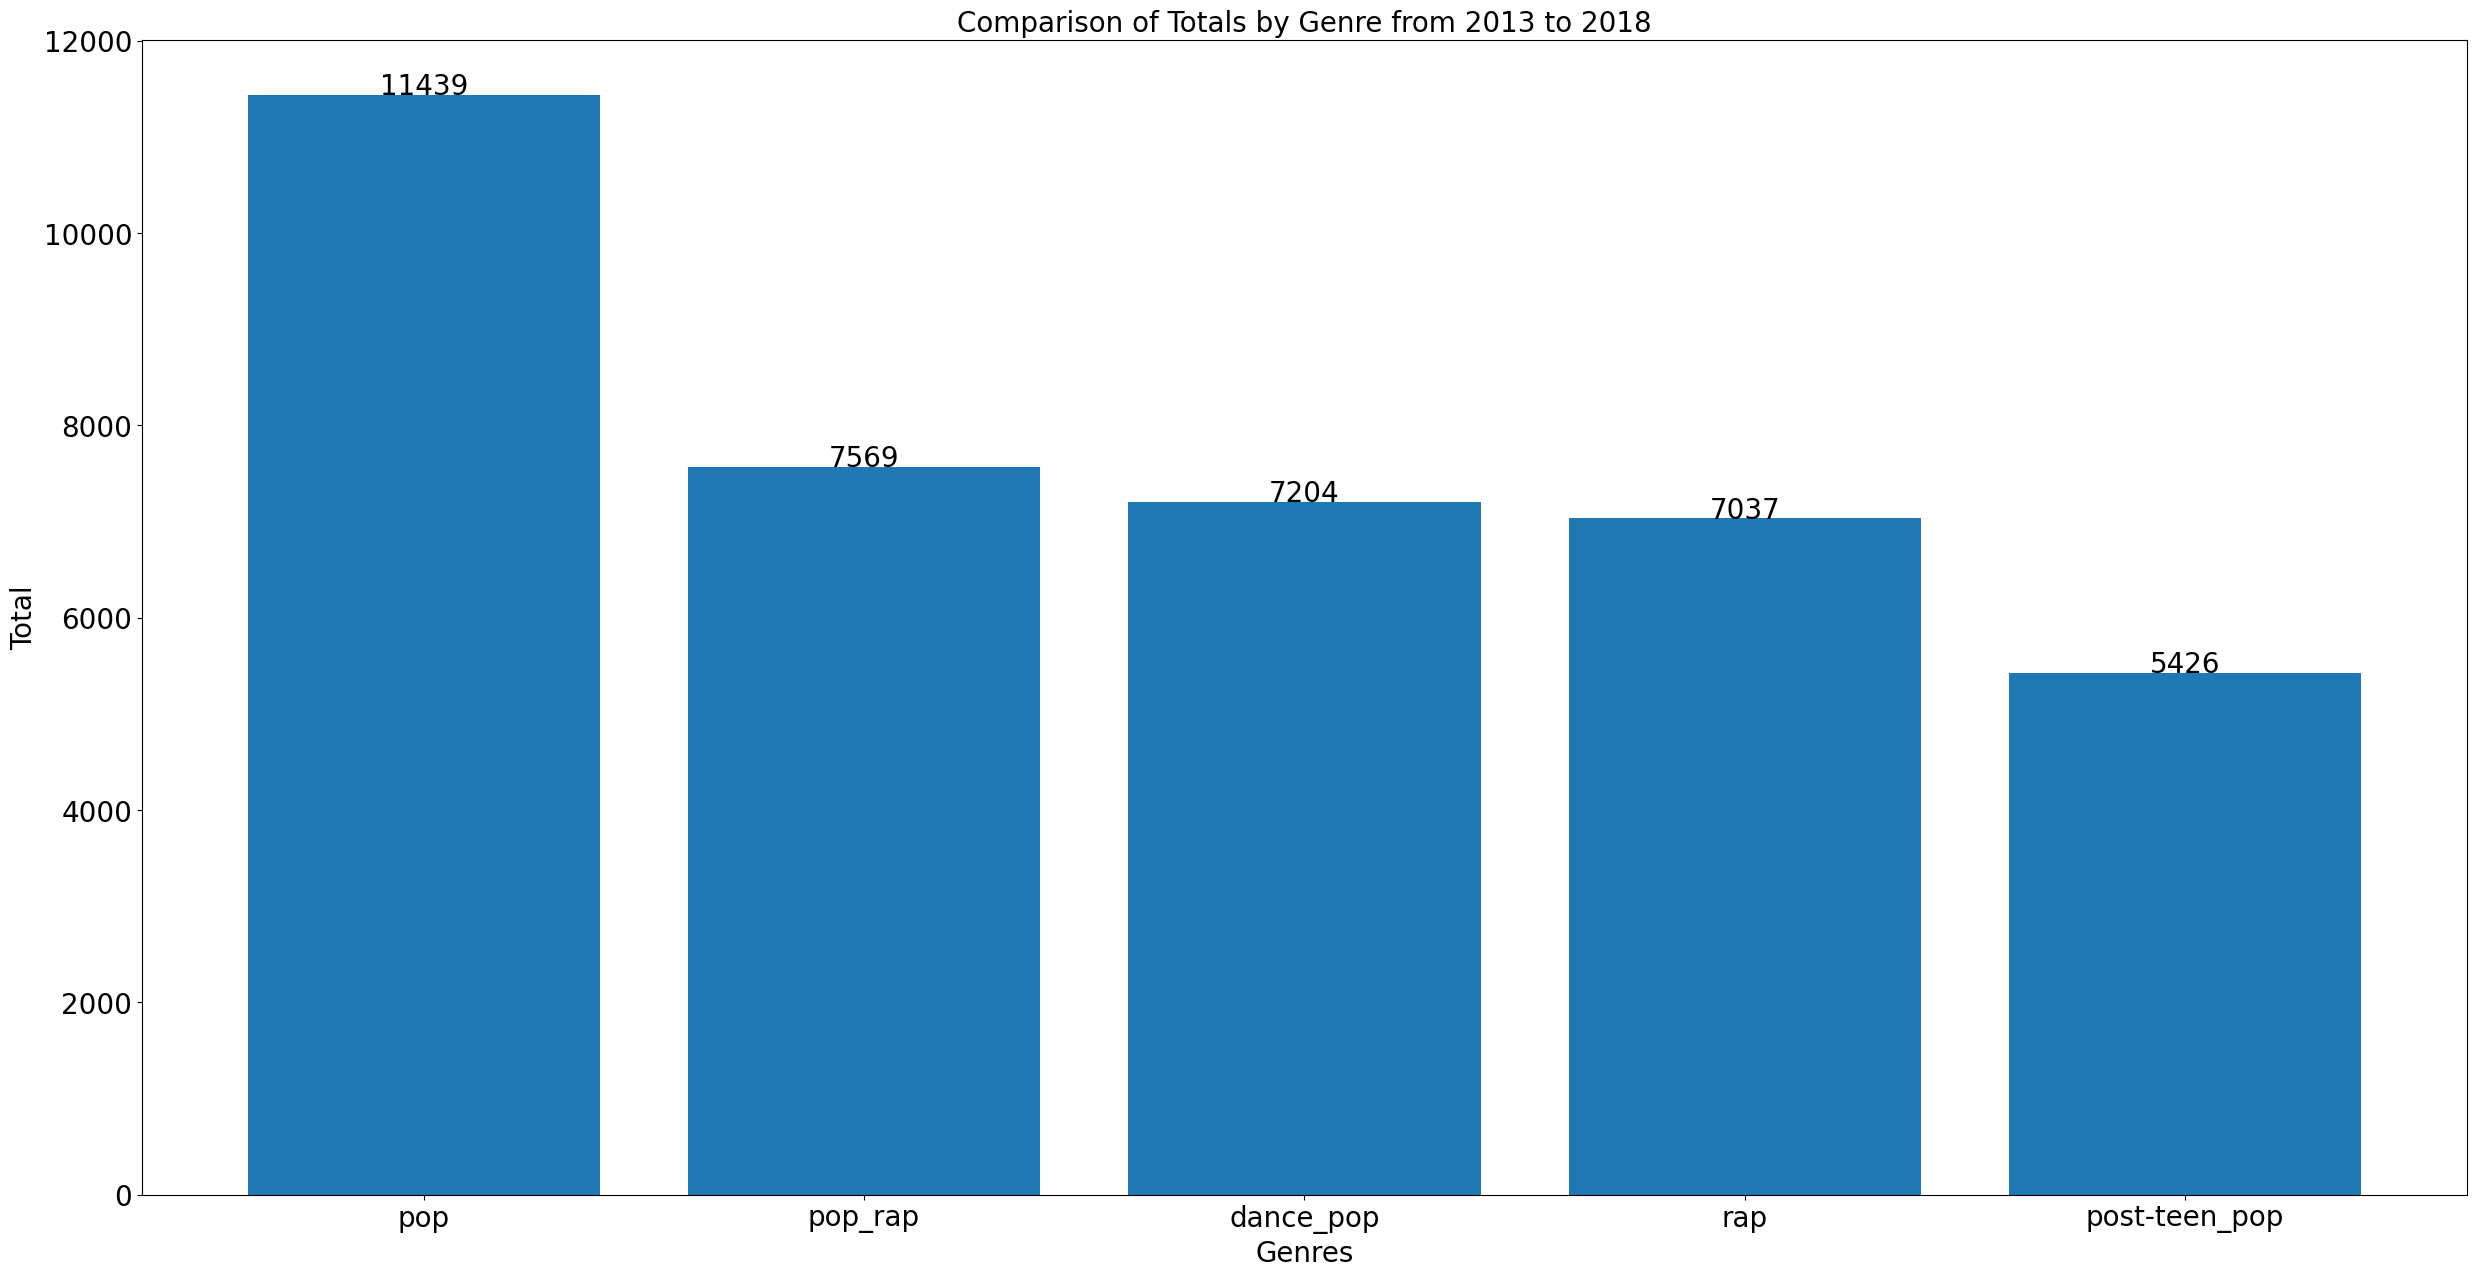

pop has this performers:Taylor Swift with song ...Ready For It?, Justin Bieber with song 2 Much, Bruno Mars with song 24K Magic, Ariana Grande with song 34+35, Miley Cyrus with song 7 Things

pop_rap has this performers:Drake with song 0 To 100 / The Catch Up, Migos Featuring Lil Uzi Vert with song Bad And Boujee, Cardi B with song Be Careful, Rae Sremmurd Featuring Gucci Mane with song Black Beatles, Macklemore & Ryan Lewis Featuring Ray Dalton with song Can't Hold Us

dance_pop has this performers:Bruno Mars with song 24K Magic, Ariana Grande with song 34+35, Miley Cyrus with song 7 Things, Taylor Swift with song Afterglow, Meghan Trainor with song All About That Bass

rap has this performers:Drake with song 0 To 100 / The Catch Up, Travis Scott with song 5% Tint, Kendrick Lamar with song Alright, Migos Featuring Lil Uzi Vert with song Bad And Boujee, Cardi B with song Be Careful

post-teen_pop has this performers:Taylor Swift with song ...Ready For It?, Justin Bieber with song 2 Muc

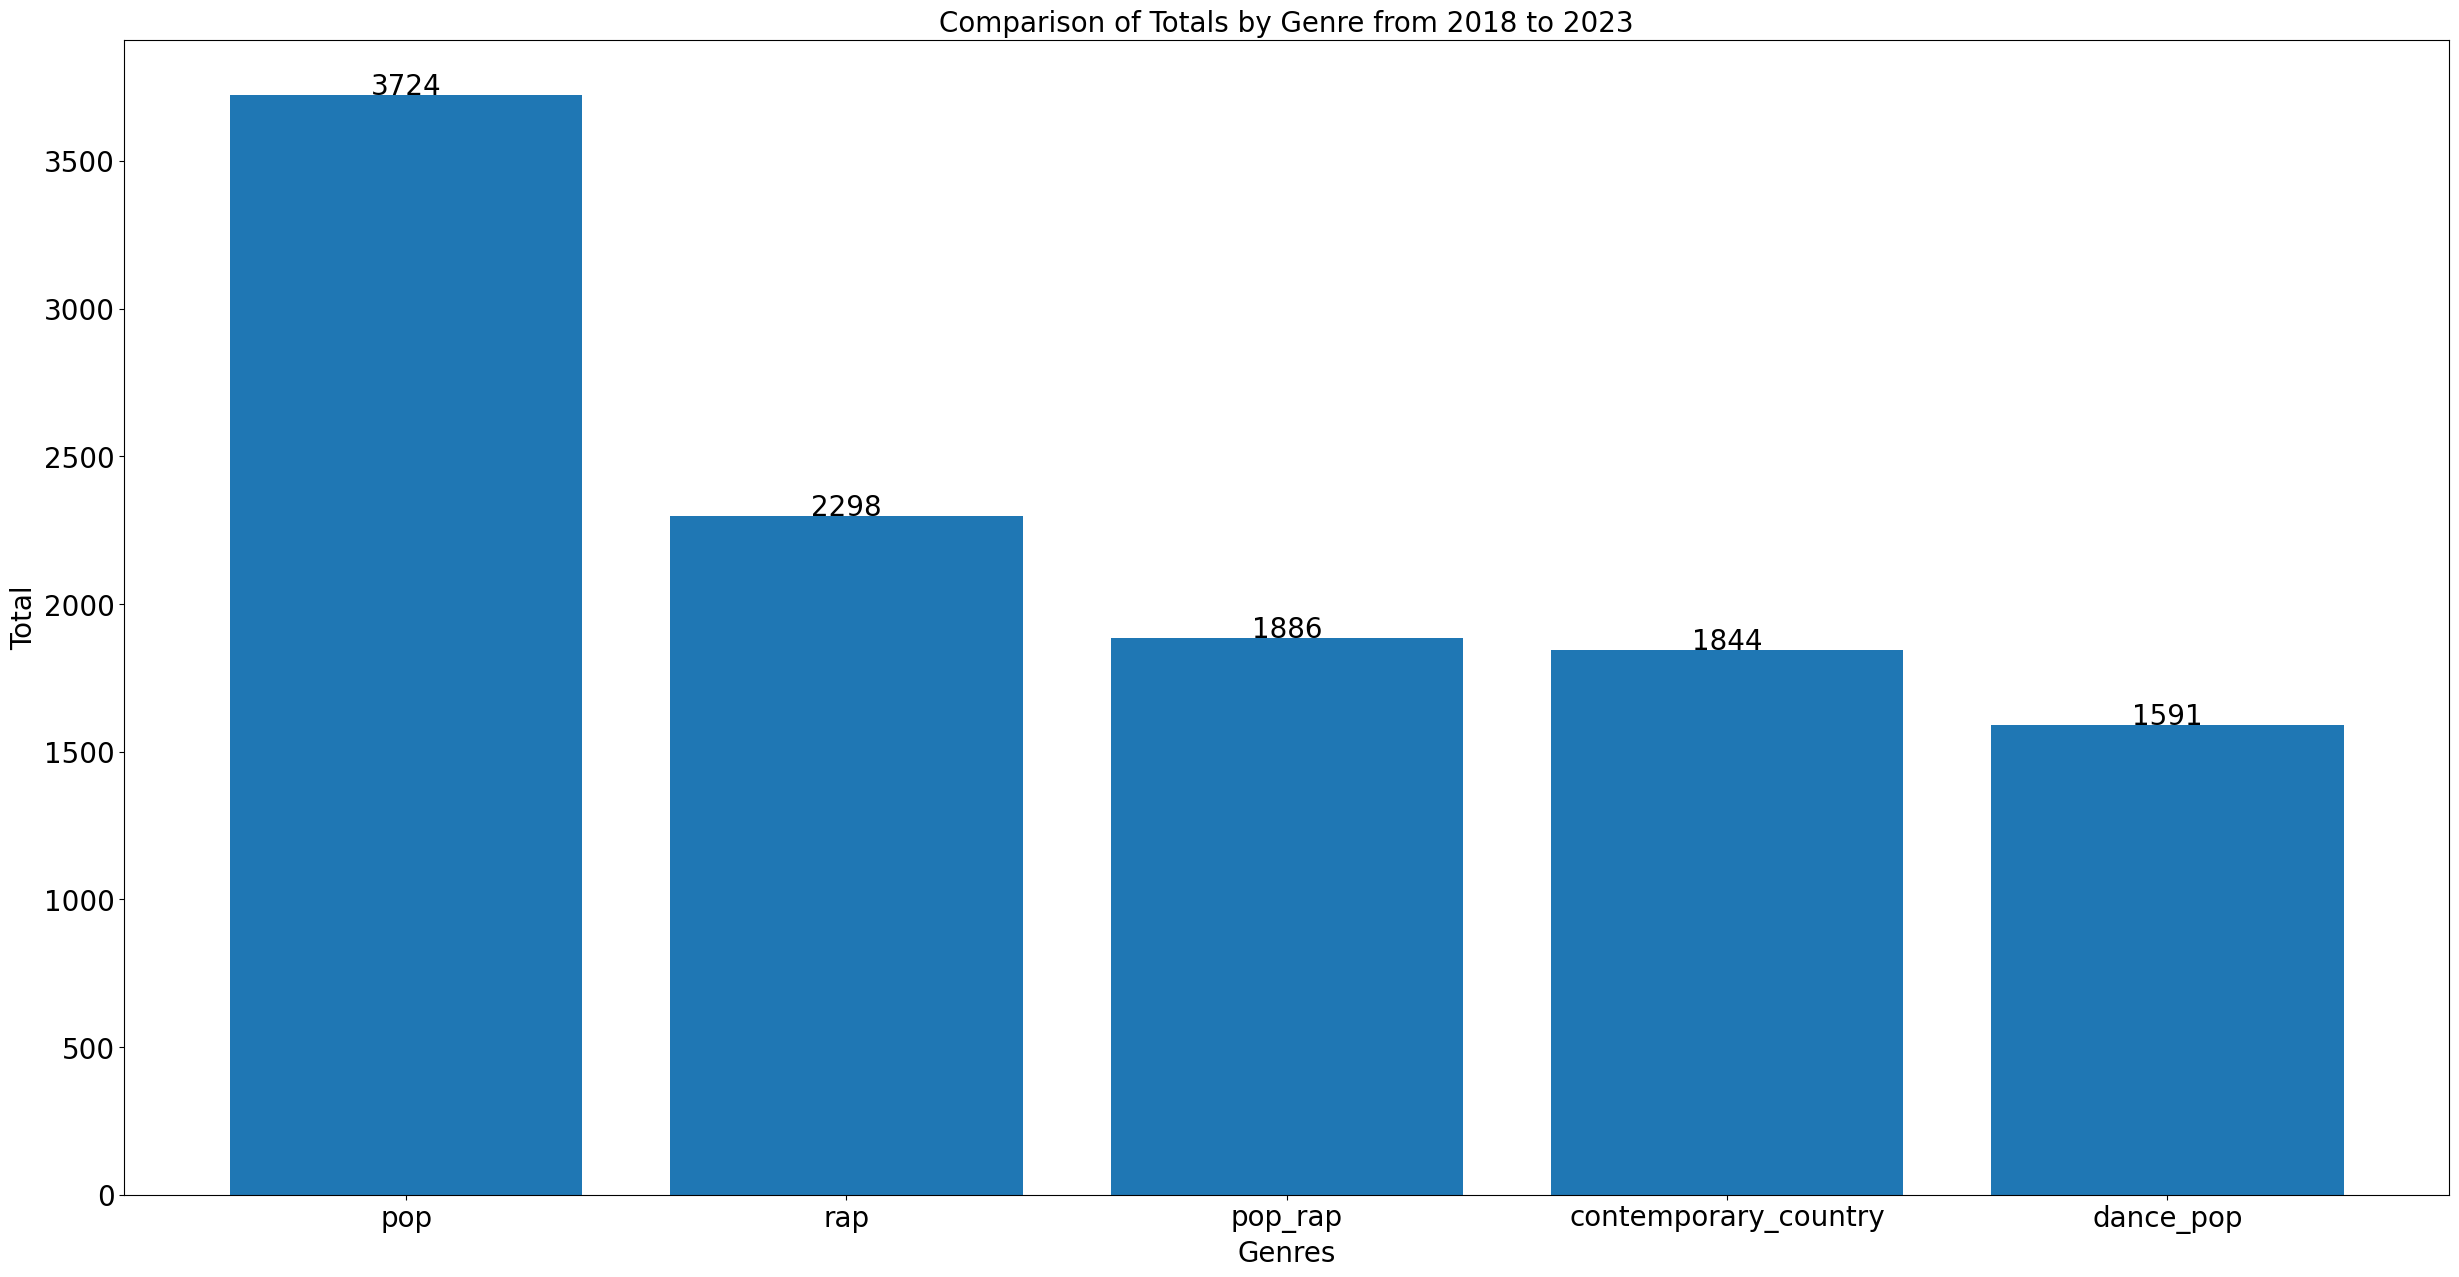

pop has this performers:Taylor Swift with song ...Ready For It?, Ariana Grande with song 34+35, Billie Eilish with song 8, Jonas Brothers with song A Little Bit Longer, The Weeknd with song A Lonely Night

rap has this performers:Drake with song 0 To 100 / The Catch Up, Travis Scott with song 5% Tint, Post Malone with song 92 Explorer, Cardi B with song Be Careful, Roddy Ricch with song Big Stepper

pop_rap has this performers:Drake with song 0 To 100 / The Catch Up, Megan Thee Stallion with song B.I.T.C.H., Cardi B with song Be Careful, Childish Gambino with song Feels Like Summer, Lizzo with song Good As Hell

contemporary_country has this performers:

dance_pop has this performers:Ariana Grande with song 34+35, Jonas Brothers with song A Little Bit Longer, Harry Styles with song Adore You, Taylor Swift with song Afterglow, Mariah Carey with song All I Want For Christmas Is You



In [38]:
#estoy aquí 2024/01/03 22:12
def figure(df_categorica):
    
    df = df_categorica.copy()
    size=20
    # Bar plot using Matplotlib
    plt.figure(figsize=(30, 15))
    plt.bar(df['Genre'], df['Count'])

    # Annotate the bars with numeric values
    for i, total in enumerate(df['Count']):
        plt.text(i, total + 1, str(total), ha='center',fontsize=size)
        # Setting font size for tick labels on x-axis and y-axis
        plt.xticks(fontsize=size)  # Change the font size here
        plt.yticks(fontsize=size)  # Change the font size here
    plt.xlabel('Genres',fontsize=size)
    plt.ylabel('Total',fontsize=size)
    anyo = df['start_date'].min().year
    anyo = str(anyo)
    anyo_fin = df['end_date'].max().year
    anyo_fin = str(anyo_fin)
    plt.title('Comparison of Totals by Genre from '+ anyo + " to " + anyo_fin,fontsize=size)
    plt.show()
    
folder_path = '.\data_genre'  # Replace this with the absolute/relative path to your folder

# Loop through files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_genres_count = pd.read_csv(file_path,sep=";").set_index("index")
        df_genres_count["start_date"] = pd.to_datetime(df_genres_count["start_date"])
        df_genres_count["end_date"] = pd.to_datetime(df_genres_count["end_date"])
        df_categorica = df_genres_count.sort_values(by="Count",ascending=False).head(5).copy()
        figure(df_categorica)
        for index,row in df_categorica.iterrows():
            value_to_find=row['Genre']
            #condition_1= df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"]
            condition_1= (df_Hot_Stuff_with_genres['WeekID_As_Date'] >= row["start_date"]) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] < row["end_date"])
            #print("condition_1_total_of",len(condition_1))
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1
            #print("condition_2_total_of",len(condition_2))
            condition_3= df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['spotify_genre_list'].apply(lambda x: value_to_find in x)]
            #print(condition_3)
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy()
            performer.reset_index(inplace=True)
            #print(performer.columns)
            #print('Performer y:',performer['Performer_y'])
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].copy()
           #print("Condition_3:",condition_3['Performer'])
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True)

            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='inner')
            df_artists_of_the_genre['Song']
            unique_values= df_artists_of_the_genre['Performer_x'].unique()
            #print(f"unique_values:{unique_values}")
            #print("df_artists_of_the_genre.head(5):",df_artists_of_the_genre,type(df_artists_of_the_genre))
            unique_df = pd.DataFrame(unique_values, columns=['Performer'])
            unique_df = unique_df.head(5).copy()
            #print(f"unique_df:{unique_df}")
            #print("performer:",len(performer))
            #print("performer type:",type(performer))
            #performer['Performer'].nunique()
            print(f"{value_to_find} has this performers:",end='')
            loop=0
            
            #print("columns:",unique_df.columns)
            for index_1, row_1 in unique_df.head(5).iterrows():
                #print(f"{', '.join(map(str, row_1['Performer_x']))}")
                df_song=df_artists_of_the_genre[df_artists_of_the_genre['Performer_x']==row_1['Performer']].copy()
                #print(f"df_song_len:{len(df_song)}")
                #print("df_song['Song'].values()",df_song['Song'].values())
                #print(df_song)
                for index_2,row_2 in df_song.head(1).iterrows():
                    song = row_2['Song']
                if loop != 0:
                    print(f", {row_1['Performer']} with song {song}",end="")
                else:
                    print(f"{row_1['Performer']} with song {song}",end="")
                loop=+1
            print("")
            print("")
            
        #draft of an idea is for each top genre show 5 artists with a top 1 under that spotify genre

            #df_Hot_Stuff_with_genres[condition['spotify_genre_list'] in row['Genre']]
            
        # Perform operations with the file
        #print(file_path)  # Example: Print file paths
